# CMIP5: Fourier Series Smoothing of Standard Deviations

The relatively continuous weather parameters need to undergo Fourier series smoothing.

In [1]:
%matplotlib inline

In [2]:
import os
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
OUT_DIR1 = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JN' \
          r'otes\Processed\CMIP5\OtherWeather_1981-2010'
OUT_DIR2 = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JN' \
          r'otes\Processed\CMIP5\OtherWeather_2011-2040'
OUT_DIR3 = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JN' \
          r'otes\Processed\CMIP5\OtherWeather_2041-2070'
OUT_DIR4 = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JN' \
          r'otes\Processed\CMIP5\OtherWeather_2071-2100'

In [4]:
LO_IN_WET1 = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JNotes\Pr' \
             r'ocessed\CMIP5\OtherWeather_1981-2010\OWeathWetDF_LOCA_Std_1981-2010.pickle'
LO_IN_DRY1 = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JNotes\Pr' \
             r'ocessed\CMIP5\OtherWeather_1981-2010\OWeathDryDF_LOCA_Std_1981-2010.pickle'
BC_IN_WET1 = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JNotes\Pr' \
             r'ocessed\CMIP5\OtherWeather_1981-2010\OWeathWetDF_BCCA_Std_1981-2010.pickle'
BC_IN_DRY1 = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JNotes\Pr' \
             r'ocessed\CMIP5\OtherWeather_1981-2010\OWeathDryDF_BCCA_Std_1981-2010.pickle'
LO_IN_WET2 = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JNotes\Pr' \
             r'ocessed\CMIP5\OtherWeather_2011-2040\OWeathWetDF_LOCA_Std_2011-2040.pickle'
LO_IN_DRY2 = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JNotes\Pr' \
             r'ocessed\CMIP5\OtherWeather_2011-2040\OWeathDryDF_LOCA_Std_2011-2040.pickle'
BC_IN_WET2 = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JNotes\Pr' \
             r'ocessed\CMIP5\OtherWeather_2011-2040\OWeathWetDF_BCCA_Std_2011-2040.pickle'
BC_IN_DRY2 = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JNotes\Pr' \
             r'ocessed\CMIP5\OtherWeather_2011-2040\OWeathDryDF_BCCA_Std_2011-2040.pickle'
LO_IN_WET3 = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JNotes\Pr' \
             r'ocessed\CMIP5\OtherWeather_2041-2070\OWeathWetDF_LOCA_Std_2041-2070.pickle'
LO_IN_DRY3 = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JNotes\Pr' \
             r'ocessed\CMIP5\OtherWeather_2041-2070\OWeathDryDF_LOCA_Std_2041-2070.pickle'
BC_IN_WET3 = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JNotes\Pr' \
             r'ocessed\CMIP5\OtherWeather_2041-2070\OWeathWetDF_BCCA_Std_2041-2070.pickle'
BC_IN_DRY3 = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JNotes\Pr' \
             r'ocessed\CMIP5\OtherWeather_2041-2070\OWeathDryDF_BCCA_Std_2041-2070.pickle'
LO_IN_WET4 = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JNotes\Pr' \
             r'ocessed\CMIP5\OtherWeather_2071-2100\OWeathWetDF_LOCA_Std_2071-2100.pickle'
LO_IN_DRY4 = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JNotes\Pr' \
             r'ocessed\CMIP5\OtherWeather_2071-2100\OWeathDryDF_LOCA_Std_2071-2100.pickle'
BC_IN_WET4 = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JNotes\Pr' \
             r'ocessed\CMIP5\OtherWeather_2071-2100\OWeathWetDF_BCCA_Std_2071-2100.pickle'
BC_IN_DRY4 = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JNotes\Pr' \
             r'ocessed\CMIP5\OtherWeather_2071-2100\OWeathDryDF_BCCA_Std_2071-2100.pickle'

In [5]:
SM_NUM = 5    # start truncation; low pass of first 5 frequencies

In [6]:
LOWetDF1 = pd.read_pickle( LO_IN_WET1 )

In [7]:
display( HTML( LOWetDF1.head().to_html() ))

In [8]:
display( HTML( LOWetDF1.describe().to_html() ))

In [9]:
LOWetDF2 = pd.read_pickle( LO_IN_WET2 )
LOWetDF3 = pd.read_pickle( LO_IN_WET3 )
LOWetDF4 = pd.read_pickle( LO_IN_WET4 )

In [10]:
BCWetDF1 = pd.read_pickle( BC_IN_WET1 )
BCWetDF2 = pd.read_pickle( BC_IN_WET2 )
BCWetDF3 = pd.read_pickle( BC_IN_WET3 )
BCWetDF4 = pd.read_pickle( BC_IN_WET4 )

In [11]:
OutCols = list( LOWetDF1.columns )
OutCols.remove('Wet Counts')
OutCols

['Tmax_C', 'Tmin_C']

In [12]:
LODryDF1 = pd.read_pickle( LO_IN_DRY1 )

In [13]:
display( HTML( LODryDF1.head().to_html() ))

In [14]:
display( HTML( LODryDF1.describe().to_html() ))

In [15]:
LODryDF2 = pd.read_pickle( LO_IN_DRY2 )
LODryDF3 = pd.read_pickle( LO_IN_DRY3 )
LODryDF4 = pd.read_pickle( LO_IN_DRY4 )

In [16]:
BCDryDF1 = pd.read_pickle( BC_IN_DRY1 )
BCDryDF2 = pd.read_pickle( BC_IN_DRY2 )
BCDryDF3 = pd.read_pickle( BC_IN_DRY3 )
BCDryDF4 = pd.read_pickle( BC_IN_DRY4 )

## Period 1, Fourier Smoothing of Temperature Parameters

In [17]:
CDateRange = '1981-2010'

In [18]:
AllDays = np.array( LOWetDF1.index, dtype=np.float32 ) + 0.5

### LOCA

#### Wet State

In [19]:
Tmax = np.array( LOWetDF1['Tmax_C'], dtype=np.float32 )

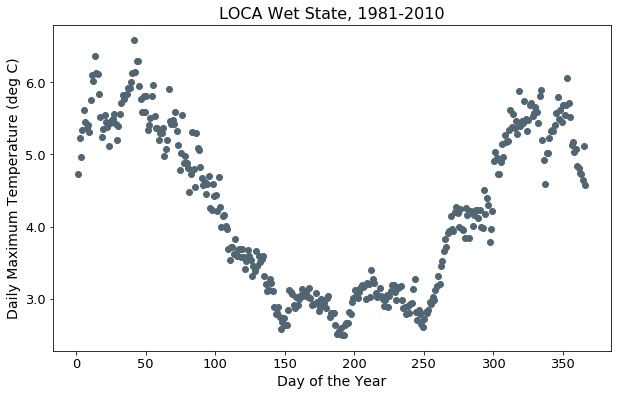

In [20]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:slate', marker='o' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.set_title("LOCA Wet State, %s" % CDateRange, fontsize=16)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Try the Fourier series transform

In [21]:
rft = np.fft.rfft(Tmax)
rft[SM_NUM:] = 0.0
tmax_smooth = np.fft.irfft(rft)

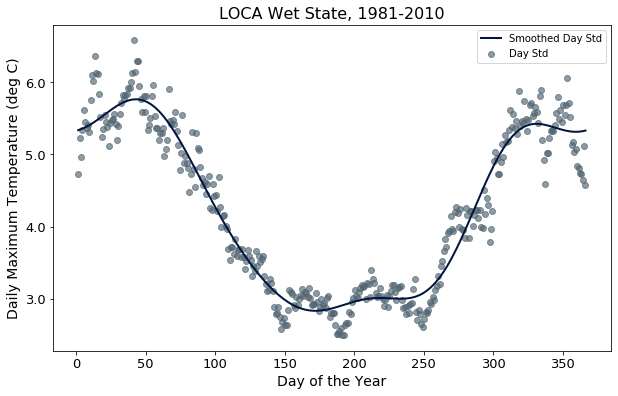

In [22]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:slate', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:navy', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("LOCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [23]:
Tmin = np.array( LOWetDF1['Tmin_C'], dtype=np.float32 )

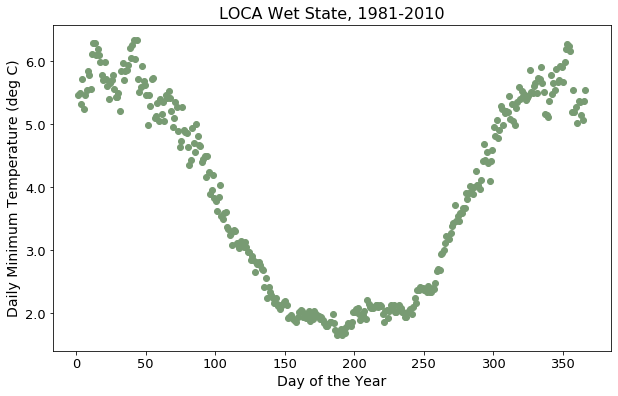

In [24]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:grey green', marker='o' )
ax11.set_title("LOCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [25]:
rft = np.fft.rfft(Tmin)
rft[SM_NUM:] = 0.0
tmin_smooth = np.fft.irfft(rft)

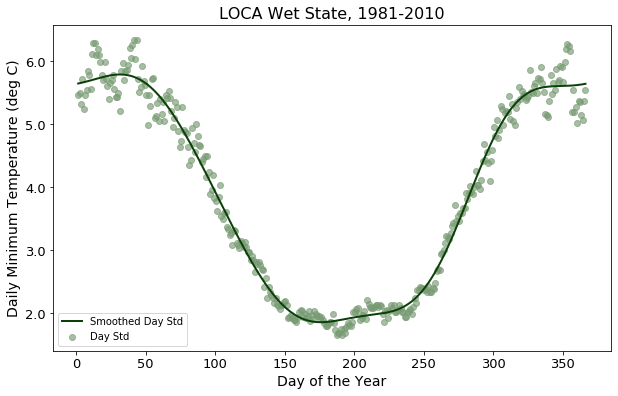

In [26]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:grey green', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:hunter green', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("LOCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

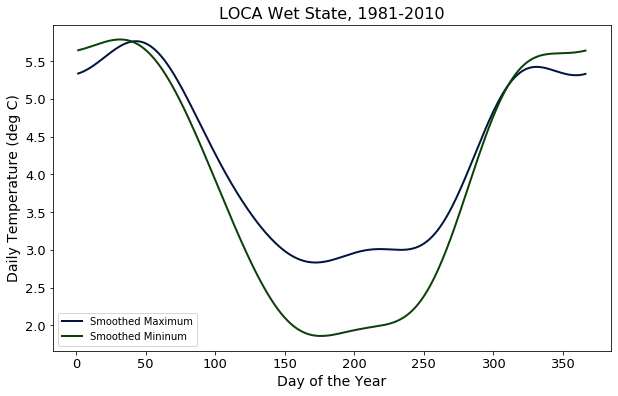

In [27]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:navy', linewidth=2.0, 
           label="Smoothed Maximum")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:hunter green', linewidth=2.0, 
           label="Smoothed Mininum")
ax11.set_title("LOCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [28]:
OutCols

['Tmax_C', 'Tmin_C']

In [29]:
DaysIndexer = np.array( LOWetDF1.index, dtype=np.int32 )
DataDict = { OutCols[0] : tmax_smooth,
             OutCols[1] : tmin_smooth,
           }
LOOutWetDF1 = pd.DataFrame(index=DaysIndexer, data=DataDict )

#### Dry State

In [30]:
Tmax = np.array( LODryDF1['Tmax_C'], dtype=np.float32 )

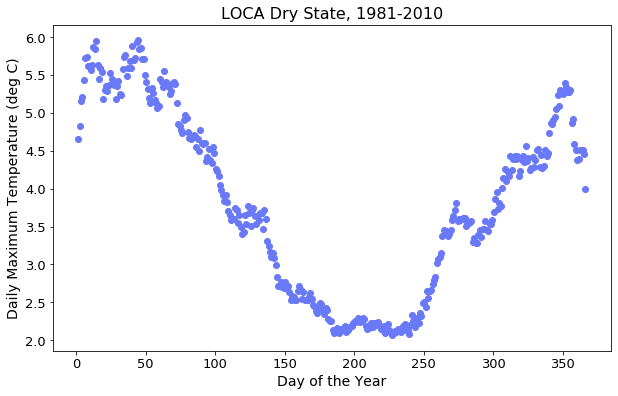

In [31]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:cornflower', marker='o' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.set_title("LOCA Dry State, %s" % CDateRange, fontsize=16)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [32]:
rft = np.fft.rfft(Tmax)
rft[SM_NUM:] = 0.0
tmax_smooth = np.fft.irfft(rft)

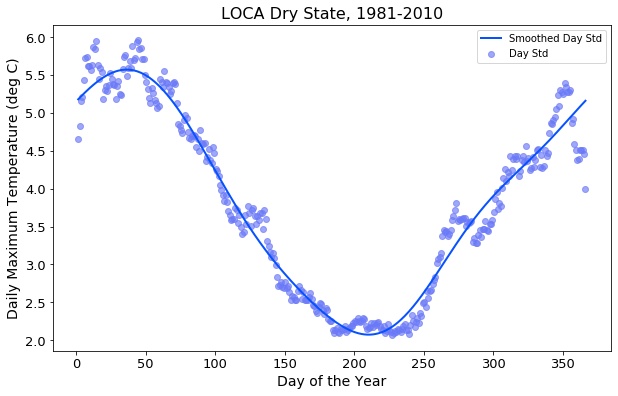

In [33]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:cornflower', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:electric blue', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("LOCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [34]:
Tmin = np.array( LODryDF1['Tmin_C'], dtype=np.float32 )

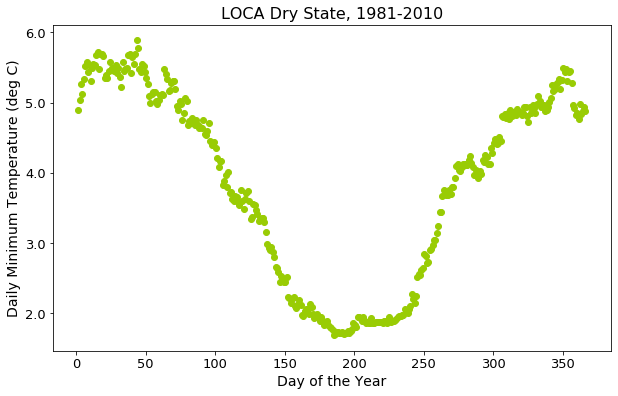

In [35]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:slime green', marker='o' )
ax11.set_title("LOCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [36]:
rft = np.fft.rfft(Tmin)
rft[SM_NUM:] = 0.0
tmin_smooth = np.fft.irfft(rft)

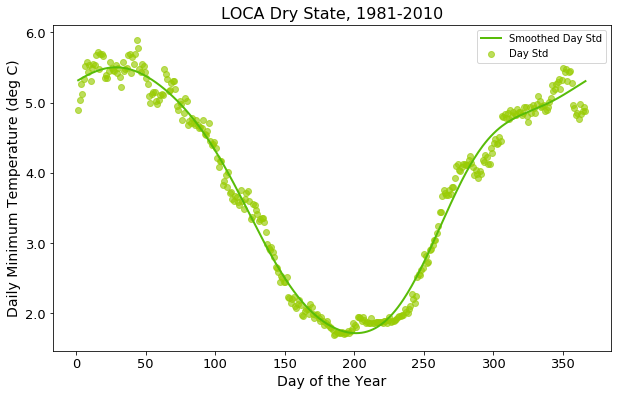

In [37]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:slime green', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:frog green', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("LOCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

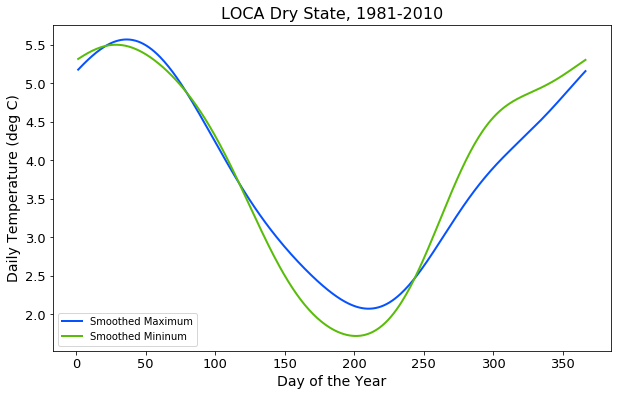

In [38]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:electric blue', linewidth=2.0, 
           label="Smoothed Maximum")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:frog green', linewidth=2.0, 
           label="Smoothed Mininum")
ax11.set_title("LOCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [39]:
DataDict = { OutCols[0] : tmax_smooth,
             OutCols[1] : tmin_smooth,
           }
LOOutDryDF1 = pd.DataFrame(index=DaysIndexer, data=DataDict )

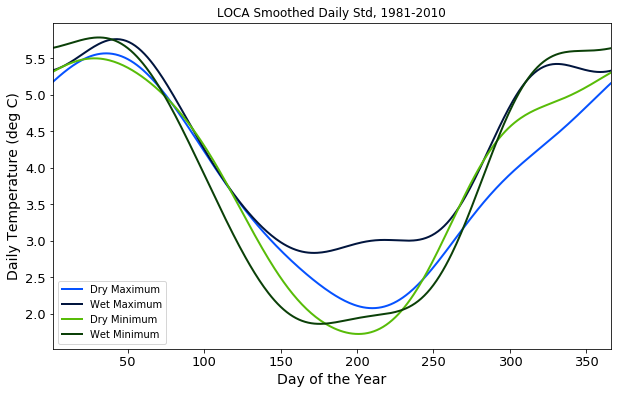

In [40]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
LOOutDryDF1.plot( y=OutCols[0], color='xkcd:electric blue', linewidth=2.0, ax=ax11, 
               label='Dry Maximum' )
LOOutWetDF1.plot( y=OutCols[0], color='xkcd:navy', linewidth=2.0, ax=ax11, 
               label='Wet Maximum' )
LOOutDryDF1.plot( y=OutCols[1], color='xkcd:frog green', linewidth=2.0, ax=ax11, 
               label='Dry Minimum' )
LOOutWetDF1.plot( y=OutCols[1], color='xkcd:hunter green', linewidth=2.0, ax=ax11, 
               label='Wet Minimum' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.set_title( "LOCA Smoothed Daily Std, %s" % CDateRange,)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### BCCA

#### Wet State

In [41]:
Tmax = np.array( BCWetDF1['Tmax_C'], dtype=np.float32 )

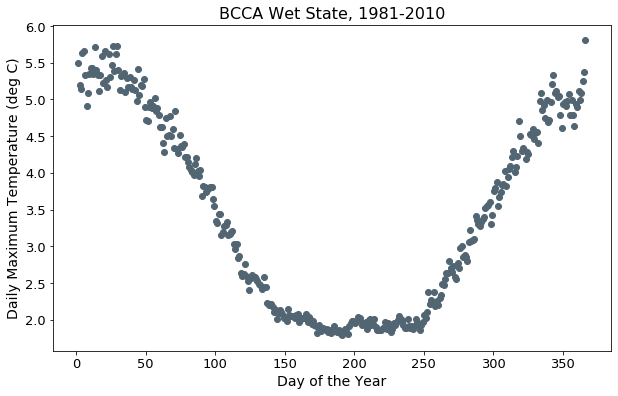

In [42]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:slate', marker='o' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.set_title("BCCA Wet State, %s" % CDateRange, fontsize=16)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Try the Fourier series transform

In [43]:
rft = np.fft.rfft(Tmax)
rft[SM_NUM:] = 0.0
tmax_smooth = np.fft.irfft(rft)

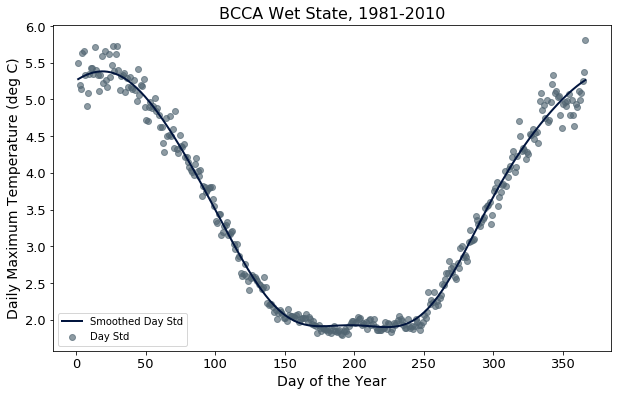

In [44]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:slate', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:navy', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("BCCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [45]:
Tmin = np.array( BCWetDF1['Tmin_C'], dtype=np.float32 )

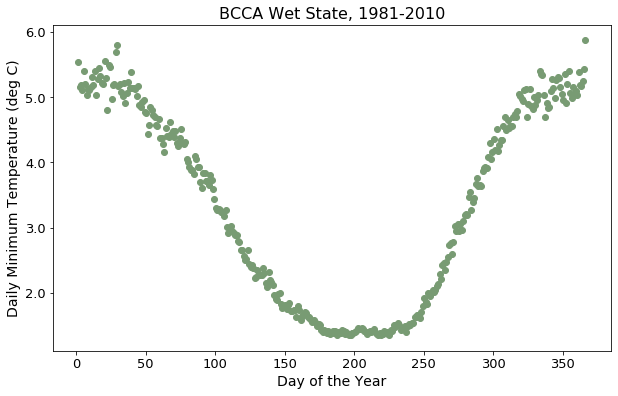

In [46]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:grey green', marker='o' )
ax11.set_title("BCCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [47]:
rft = np.fft.rfft(Tmin)
rft[SM_NUM:] = 0.0
tmin_smooth = np.fft.irfft(rft)

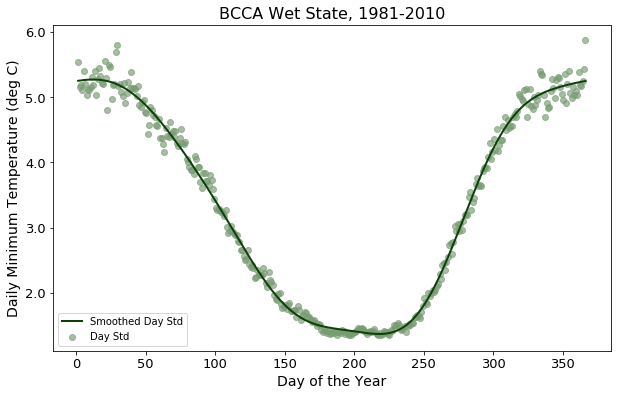

In [48]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:grey green', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:hunter green', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("BCCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

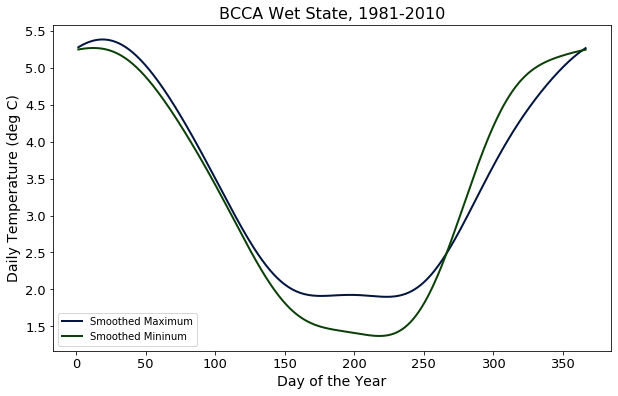

In [49]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:navy', linewidth=2.0, 
           label="Smoothed Maximum")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:hunter green', linewidth=2.0, 
           label="Smoothed Mininum")
ax11.set_title("BCCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [50]:
OutCols

['Tmax_C', 'Tmin_C']

In [51]:
DaysIndexer = np.array( BCWetDF1.index, dtype=np.int32 )
DataDict = { OutCols[0] : tmax_smooth,
             OutCols[1] : tmin_smooth,
           }
BCOutWetDF1 = pd.DataFrame(index=DaysIndexer, data=DataDict )

#### Dry State

In [52]:
Tmax = np.array( BCDryDF1['Tmax_C'], dtype=np.float32 )

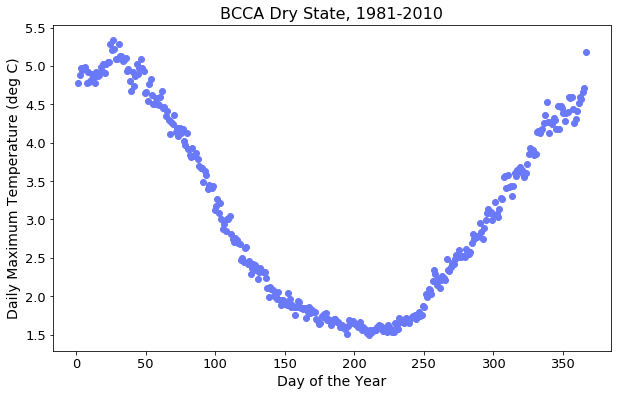

In [53]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:cornflower', marker='o' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.set_title("BCCA Dry State, %s" % CDateRange, fontsize=16)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [54]:
rft = np.fft.rfft(Tmax)
rft[SM_NUM:] = 0.0
tmax_smooth = np.fft.irfft(rft)

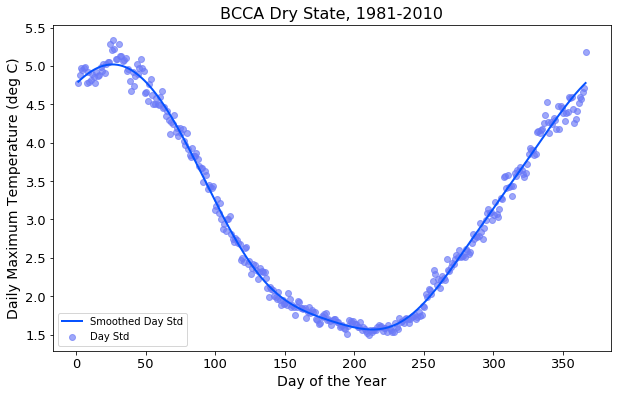

In [55]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:cornflower', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:electric blue', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("BCCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [56]:
Tmin = np.array( BCDryDF1['Tmin_C'], dtype=np.float32 )

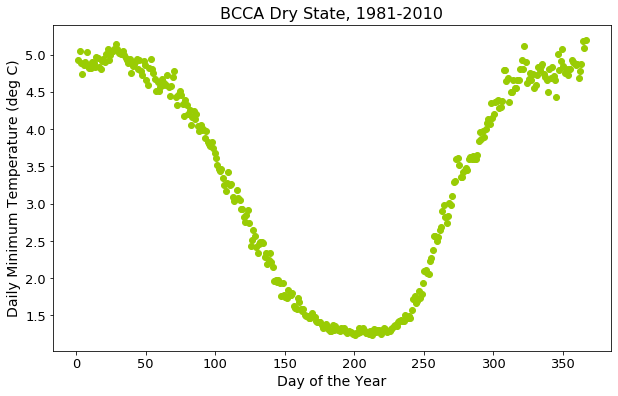

In [57]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:slime green', marker='o' )
ax11.set_title("BCCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [58]:
rft = np.fft.rfft(Tmin)
rft[SM_NUM:] = 0.0
tmin_smooth = np.fft.irfft(rft)

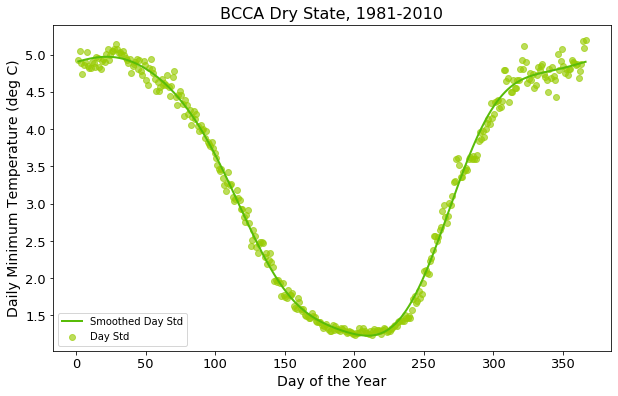

In [59]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:slime green', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:frog green', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("BCCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

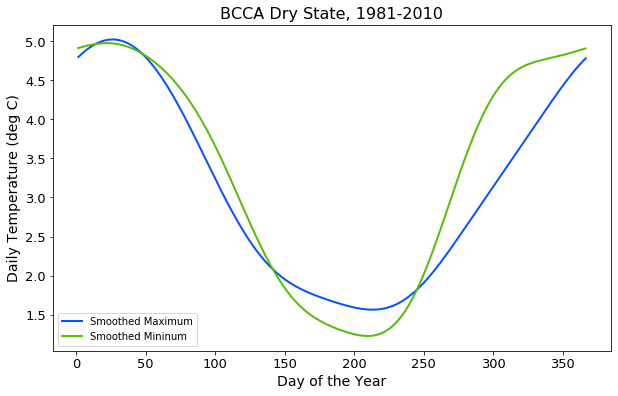

In [60]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:electric blue', linewidth=2.0, 
           label="Smoothed Maximum")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:frog green', linewidth=2.0, 
           label="Smoothed Mininum")
ax11.set_title("BCCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [61]:
DataDict = { OutCols[0] : tmax_smooth,
             OutCols[1] : tmin_smooth,
           }
BCOutDryDF1 = pd.DataFrame(index=DaysIndexer, data=DataDict )

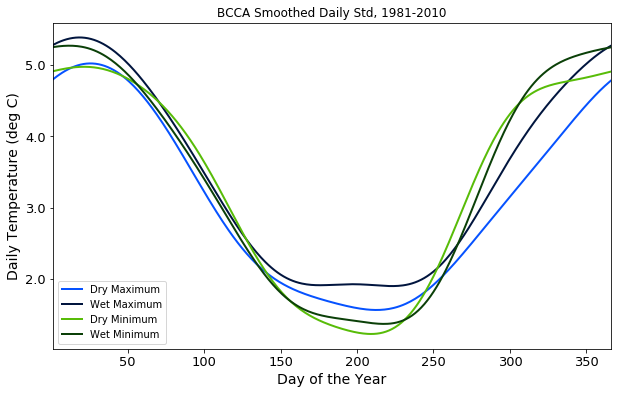

In [62]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
BCOutDryDF1.plot( y=OutCols[0], color='xkcd:electric blue', linewidth=2.0, ax=ax11, 
               label='Dry Maximum' )
BCOutWetDF1.plot( y=OutCols[0], color='xkcd:navy', linewidth=2.0, ax=ax11, 
               label='Wet Maximum' )
BCOutDryDF1.plot( y=OutCols[1], color='xkcd:frog green', linewidth=2.0, ax=ax11, 
               label='Dry Minimum' )
BCOutWetDF1.plot( y=OutCols[1], color='xkcd:hunter green', linewidth=2.0, ax=ax11, 
               label='Wet Minimum' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.set_title( "BCCA Smoothed Daily Std, %s" % CDateRange,)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Output Smoothed

In [63]:
display( HTML( LOOutWetDF1.describe().to_html() ) )

In [64]:
display( HTML( LOOutDryDF1.describe().to_html() ) )

In [65]:
OutXLSX = os.path.normpath( os.path.join( OUT_DIR1, "OWeath_Smooth_Std_%s.xlsx" % CDateRange ))
with pd.ExcelWriter(OutXLSX) as writer:
    LOOutWetDF1.to_excel( writer, sheet_name="LOCA Wet Days", index=True, 
                          index_label="Days", columns=OutCols )
    LOOutDryDF1.to_excel( writer, sheet_name="LOCA Dry Days", index=True, 
                          index_label="Days", columns=OutCols )
    BCOutWetDF1.to_excel( writer, sheet_name="BCCA Wet Days", index=True, 
                          index_label="Days", columns=OutCols )
    BCOutDryDF1.to_excel( writer, sheet_name="BCCA Dry Days", index=True, 
                          index_label="Days", columns=OutCols )

In [66]:
PickOut = os.path.normpath( os.path.join( OUT_DIR1, "OWeath_LOCA_Wet_Smooth_Std_%s.pickle" % CDateRange ))
LOOutWetDF1.to_pickle( PickOut )
PickOut = os.path.normpath( os.path.join( OUT_DIR1, "OWeath_LOCA_Dry_Smooth_Std_%s.pickle" % CDateRange ))
LOOutDryDF1.to_pickle( PickOut )
PickOut = os.path.normpath( os.path.join( OUT_DIR1, "OWeath_BCCA_Wet_Smooth_Std_%s.pickle" % CDateRange ))
BCOutWetDF1.to_pickle( PickOut )
PickOut = os.path.normpath( os.path.join( OUT_DIR1, "OWeath_BCCA_Dry_Smooth_Std_%s.pickle" % CDateRange ))
BCOutDryDF1.to_pickle( PickOut )

## Period 2, Fourier Smoothing of Temperature Parameters

In [67]:
CDateRange = '2011-2040'

### LOCA

#### Wet State

In [68]:
Tmax = np.array( LOWetDF2['Tmax_C'], dtype=np.float32 )

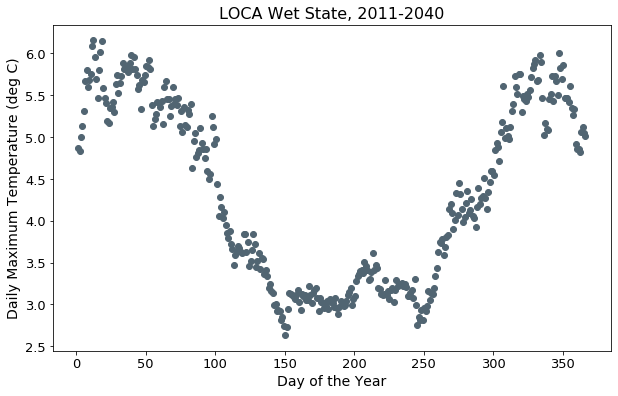

In [69]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:slate', marker='o' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.set_title("LOCA Wet State, %s" % CDateRange, fontsize=16)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Try the Fourier series transform

In [70]:
rft = np.fft.rfft(Tmax)
rft[SM_NUM:] = 0.0
tmax_smooth = np.fft.irfft(rft)

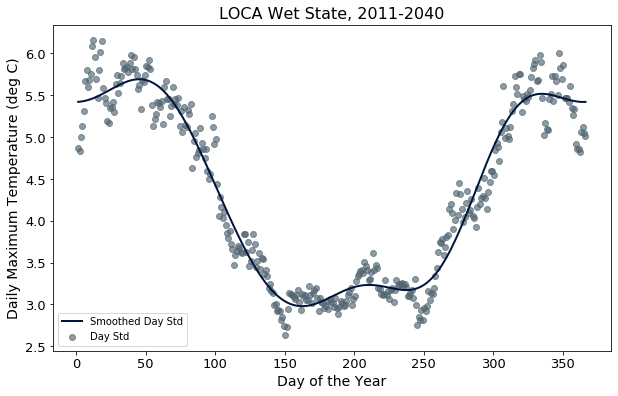

In [71]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:slate', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:navy', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("LOCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [72]:
Tmin = np.array( LOWetDF2['Tmin_C'], dtype=np.float32 )

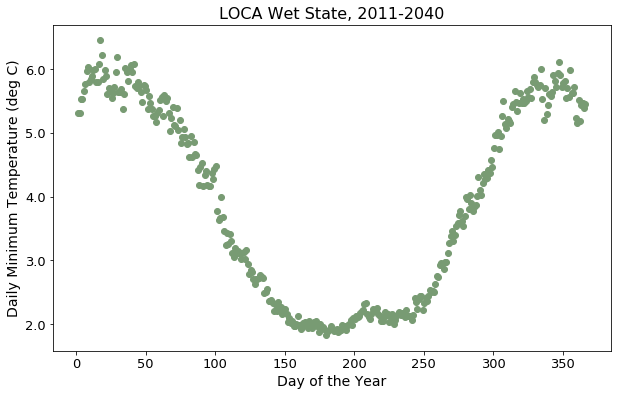

In [73]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:grey green', marker='o' )
ax11.set_title("LOCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [74]:
rft = np.fft.rfft(Tmin)
rft[SM_NUM:] = 0.0
tmin_smooth = np.fft.irfft(rft)

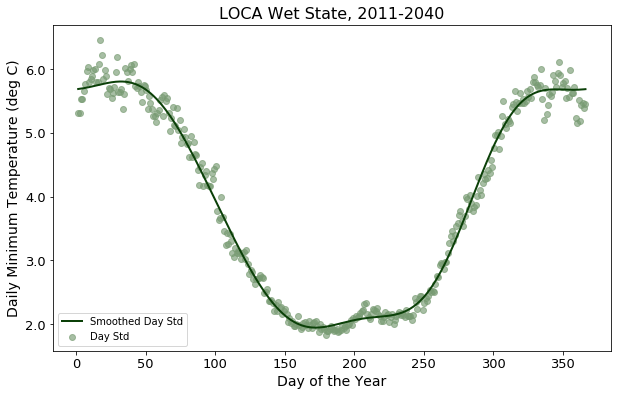

In [75]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:grey green', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:hunter green', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("LOCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

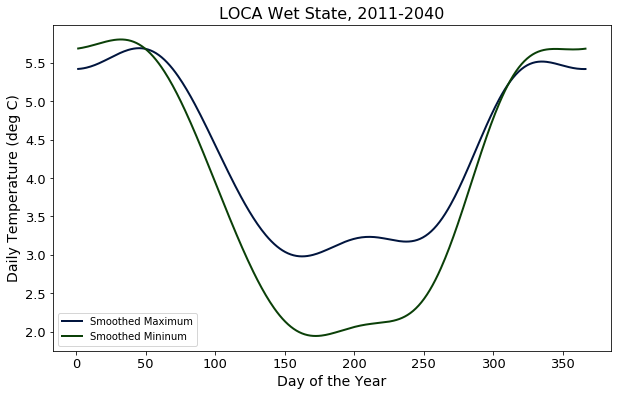

In [76]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:navy', linewidth=2.0, 
           label="Smoothed Maximum")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:hunter green', linewidth=2.0, 
           label="Smoothed Mininum")
ax11.set_title("LOCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [77]:
OutCols

['Tmax_C', 'Tmin_C']

In [78]:
DaysIndexer = np.array( LOWetDF2.index, dtype=np.int32 )
DataDict = { OutCols[0] : tmax_smooth,
             OutCols[1] : tmin_smooth,
           }
LOOutWetDF2 = pd.DataFrame(index=DaysIndexer, data=DataDict )

#### Dry State

In [79]:
Tmax = np.array( LODryDF2['Tmax_C'], dtype=np.float32 )

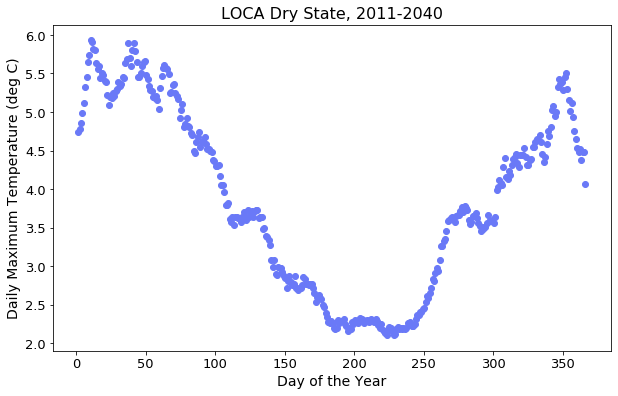

In [80]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:cornflower', marker='o' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.set_title("LOCA Dry State, %s" % CDateRange, fontsize=16)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [81]:
rft = np.fft.rfft(Tmax)
rft[SM_NUM:] = 0.0
tmax_smooth = np.fft.irfft(rft)

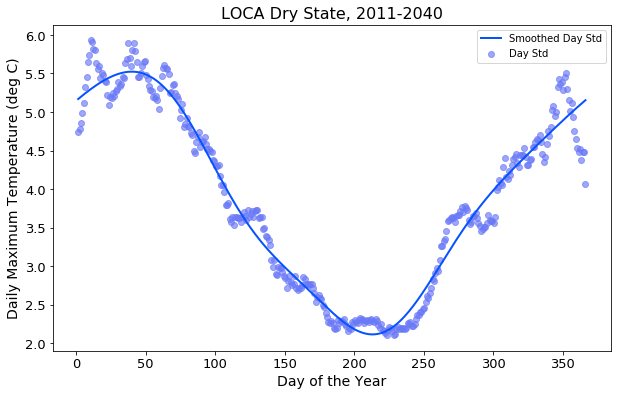

In [82]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:cornflower', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:electric blue', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("LOCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [83]:
Tmin = np.array( LODryDF2['Tmin_C'], dtype=np.float32 )

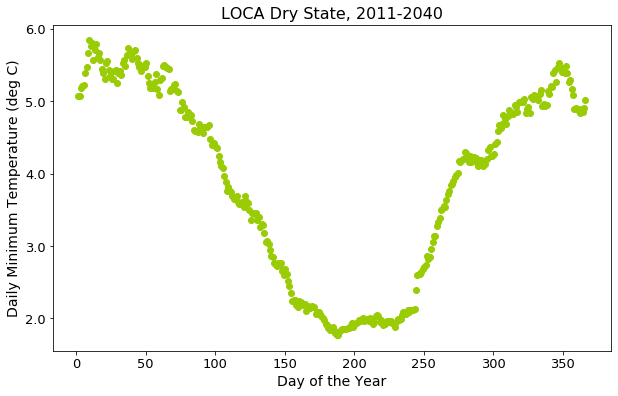

In [84]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:slime green', marker='o' )
ax11.set_title("LOCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [85]:
rft = np.fft.rfft(Tmin)
rft[SM_NUM:] = 0.0
tmin_smooth = np.fft.irfft(rft)

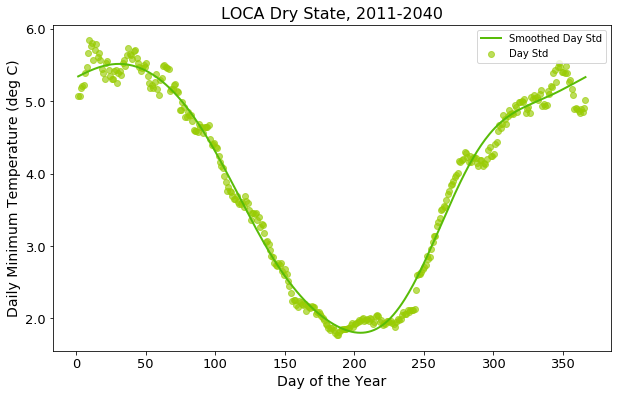

In [86]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:slime green', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:frog green', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("LOCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

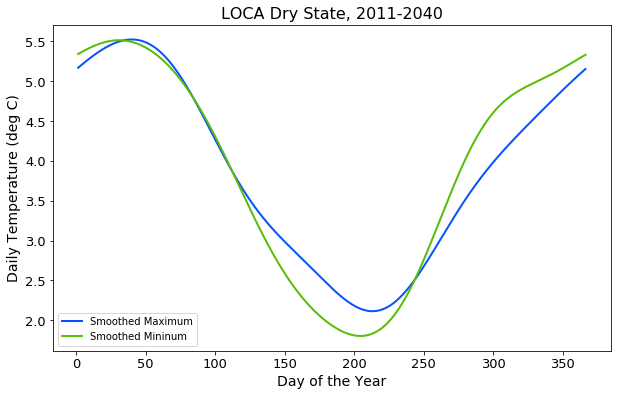

In [87]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:electric blue', linewidth=2.0, 
           label="Smoothed Maximum")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:frog green', linewidth=2.0, 
           label="Smoothed Mininum")
ax11.set_title("LOCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [88]:
DataDict = { OutCols[0] : tmax_smooth,
             OutCols[1] : tmin_smooth,
           }
LOOutDryDF2 = pd.DataFrame(index=DaysIndexer, data=DataDict )

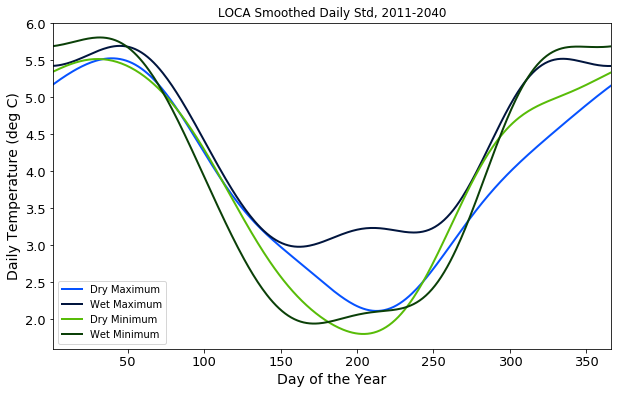

In [89]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
LOOutDryDF2.plot( y=OutCols[0], color='xkcd:electric blue', linewidth=2.0, ax=ax11, 
               label='Dry Maximum' )
LOOutWetDF2.plot( y=OutCols[0], color='xkcd:navy', linewidth=2.0, ax=ax11, 
               label='Wet Maximum' )
LOOutDryDF2.plot( y=OutCols[1], color='xkcd:frog green', linewidth=2.0, ax=ax11, 
               label='Dry Minimum' )
LOOutWetDF2.plot( y=OutCols[1], color='xkcd:hunter green', linewidth=2.0, ax=ax11, 
               label='Wet Minimum' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.set_title( "LOCA Smoothed Daily Std, %s" % CDateRange,)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### BCCA

#### Wet State

In [90]:
Tmax = np.array( BCWetDF2['Tmax_C'], dtype=np.float32 )

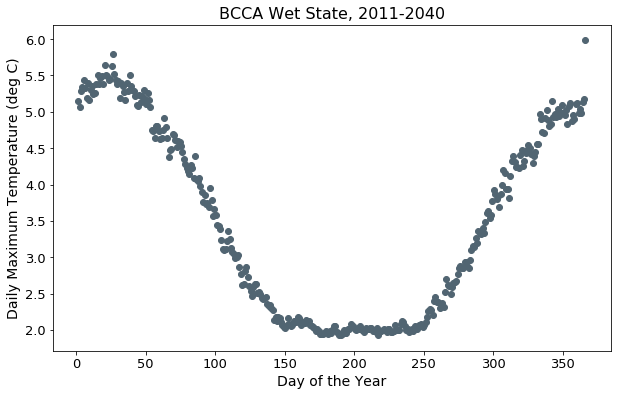

In [91]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:slate', marker='o' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.set_title("BCCA Wet State, %s" % CDateRange, fontsize=16)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Try the Fourier series transform

In [92]:
rft = np.fft.rfft(Tmax)
rft[SM_NUM:] = 0.0
tmax_smooth = np.fft.irfft(rft)

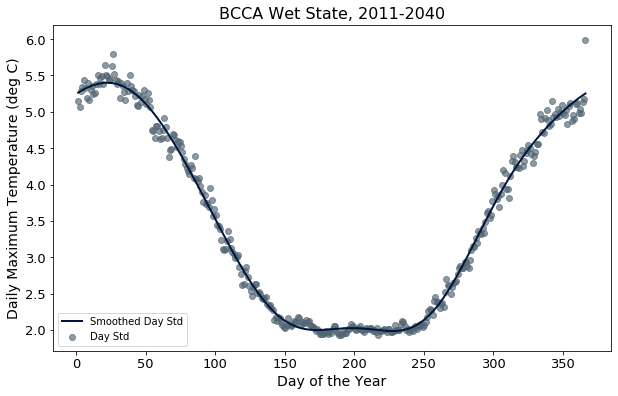

In [93]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:slate', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:navy', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("BCCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [94]:
Tmin = np.array( BCWetDF2['Tmin_C'], dtype=np.float32 )

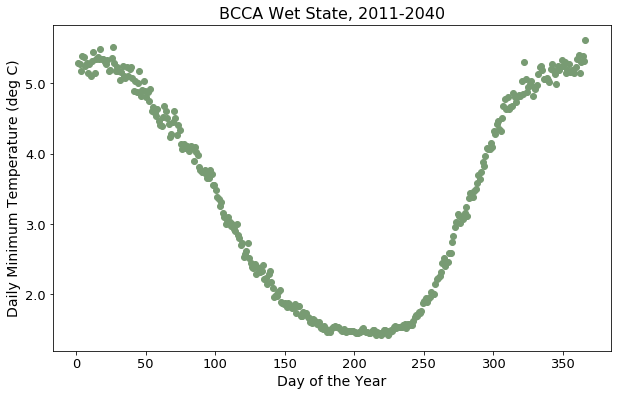

In [95]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:grey green', marker='o' )
ax11.set_title("BCCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [96]:
rft = np.fft.rfft(Tmin)
rft[SM_NUM:] = 0.0
tmin_smooth = np.fft.irfft(rft)

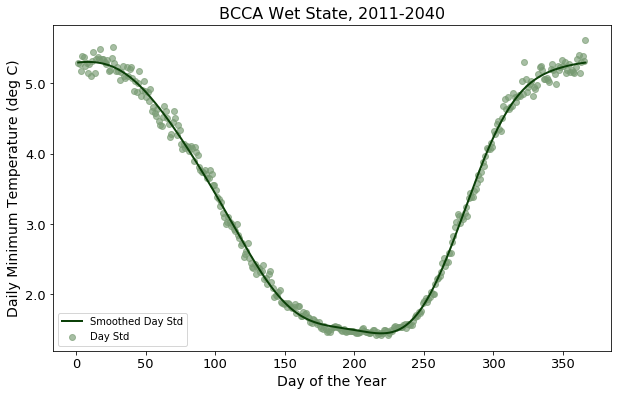

In [97]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:grey green', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:hunter green', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("BCCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

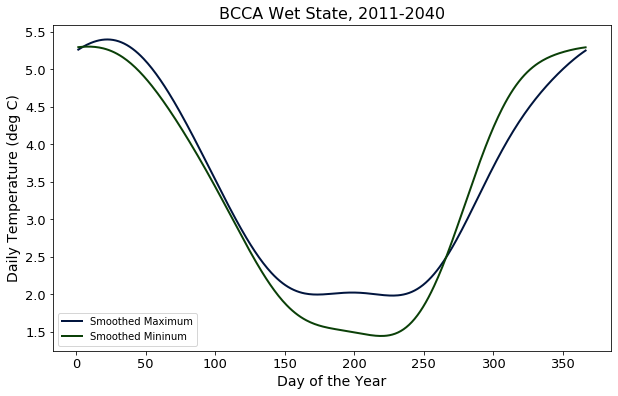

In [98]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:navy', linewidth=2.0, 
           label="Smoothed Maximum")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:hunter green', linewidth=2.0, 
           label="Smoothed Mininum")
ax11.set_title("BCCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [99]:
OutCols

['Tmax_C', 'Tmin_C']

In [100]:
DaysIndexer = np.array( BCWetDF2.index, dtype=np.int32 )
DataDict = { OutCols[0] : tmax_smooth,
             OutCols[1] : tmin_smooth,
           }
BCOutWetDF2 = pd.DataFrame(index=DaysIndexer, data=DataDict )

#### Dry State

In [101]:
Tmax = np.array( BCDryDF2['Tmax_C'], dtype=np.float32 )

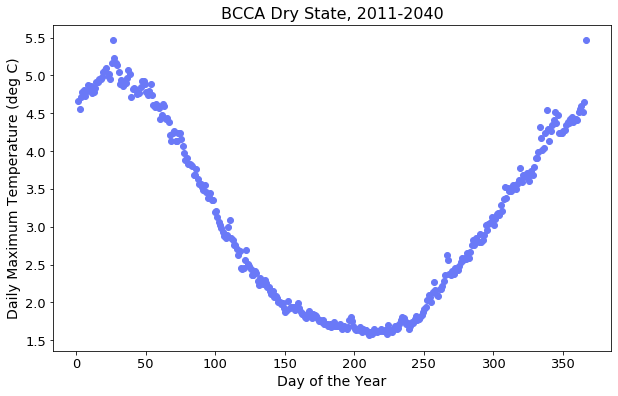

In [102]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:cornflower', marker='o' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.set_title("BCCA Dry State, %s" % CDateRange, fontsize=16)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [103]:
rft = np.fft.rfft(Tmax)
rft[SM_NUM:] = 0.0
tmax_smooth = np.fft.irfft(rft)

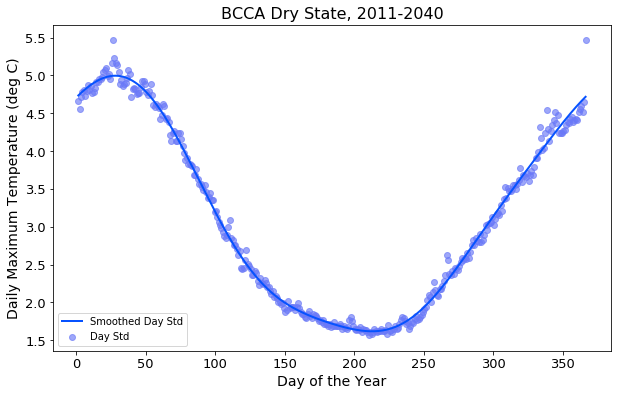

In [104]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:cornflower', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:electric blue', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("BCCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [105]:
Tmin = np.array( BCDryDF2['Tmin_C'], dtype=np.float32 )

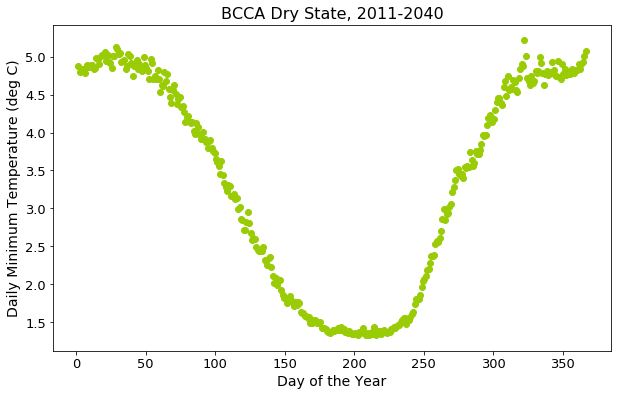

In [106]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:slime green', marker='o' )
ax11.set_title("BCCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [107]:
rft = np.fft.rfft(Tmin)
rft[SM_NUM:] = 0.0
tmin_smooth = np.fft.irfft(rft)

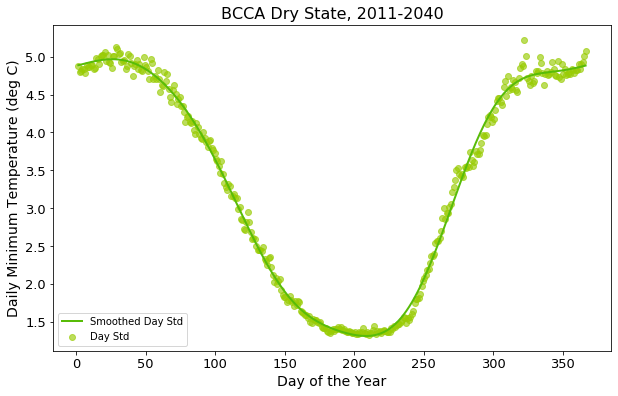

In [108]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:slime green', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:frog green', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("BCCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

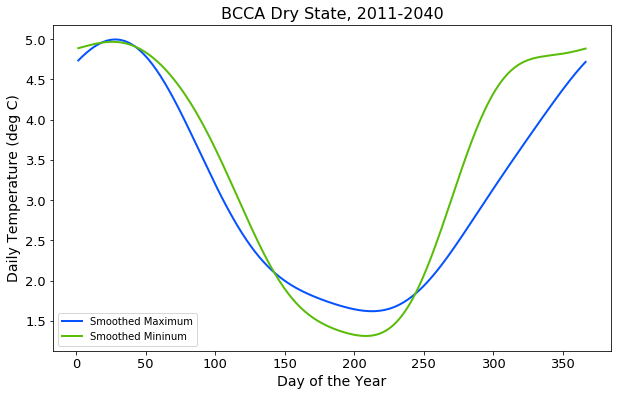

In [109]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:electric blue', linewidth=2.0, 
           label="Smoothed Maximum")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:frog green', linewidth=2.0, 
           label="Smoothed Mininum")
ax11.set_title("BCCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [110]:
DataDict = { OutCols[0] : tmax_smooth,
             OutCols[1] : tmin_smooth,
           }
BCOutDryDF2 = pd.DataFrame(index=DaysIndexer, data=DataDict )

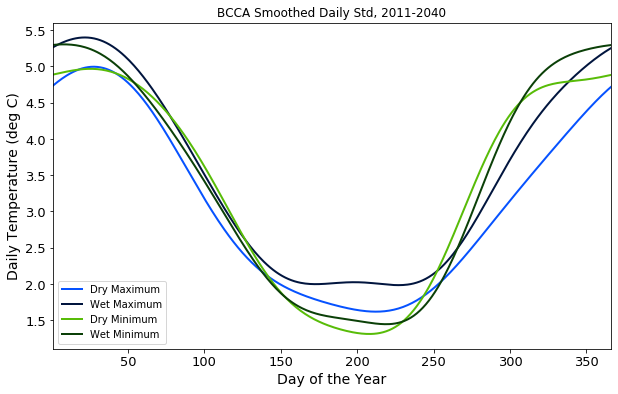

In [111]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
BCOutDryDF2.plot( y=OutCols[0], color='xkcd:electric blue', linewidth=2.0, ax=ax11, 
               label='Dry Maximum' )
BCOutWetDF2.plot( y=OutCols[0], color='xkcd:navy', linewidth=2.0, ax=ax11, 
               label='Wet Maximum' )
BCOutDryDF2.plot( y=OutCols[1], color='xkcd:frog green', linewidth=2.0, ax=ax11, 
               label='Dry Minimum' )
BCOutWetDF2.plot( y=OutCols[1], color='xkcd:hunter green', linewidth=2.0, ax=ax11, 
               label='Wet Minimum' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.set_title( "BCCA Smoothed Daily Std, %s" % CDateRange,)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Output Smoothed

In [112]:
display( HTML( LOOutWetDF2.describe().to_html() ) )

In [113]:
display( HTML( LOOutDryDF2.describe().to_html() ) )

In [114]:
OutXLSX = os.path.normpath( os.path.join( OUT_DIR2, "OWeath_Smooth_Std_%s.xlsx" % CDateRange ))
with pd.ExcelWriter(OutXLSX) as writer:
    LOOutWetDF2.to_excel( writer, sheet_name="LOCA Wet Days", index=True, 
                          index_label="Days", columns=OutCols )
    LOOutDryDF2.to_excel( writer, sheet_name="LOCA Dry Days", index=True, 
                          index_label="Days", columns=OutCols )
    BCOutWetDF2.to_excel( writer, sheet_name="BCCA Wet Days", index=True, 
                          index_label="Days", columns=OutCols )
    BCOutDryDF2.to_excel( writer, sheet_name="BCCA Dry Days", index=True, 
                          index_label="Days", columns=OutCols )

In [115]:
PickOut = os.path.normpath( os.path.join( OUT_DIR2, "OWeath_LOCA_Wet_Smooth_Std_%s.pickle" % CDateRange ))
LOOutWetDF2.to_pickle( PickOut )
PickOut = os.path.normpath( os.path.join( OUT_DIR2, "OWeath_LOCA_Dry_Smooth_Std_%s.pickle" % CDateRange ))
LOOutDryDF2.to_pickle( PickOut )
PickOut = os.path.normpath( os.path.join( OUT_DIR2, "OWeath_BCCA_Wet_Smooth_Std_%s.pickle" % CDateRange ))
BCOutWetDF2.to_pickle( PickOut )
PickOut = os.path.normpath( os.path.join( OUT_DIR2, "OWeath_BCCA_Dry_Smooth_Std_%s.pickle" % CDateRange ))
BCOutDryDF2.to_pickle( PickOut )

## Period 3, Fourier Smoothing of Temperature Parameters

In [116]:
CDateRange = '2041-2070'

### LOCA

#### Wet State

In [117]:
Tmax = np.array( LOWetDF3['Tmax_C'], dtype=np.float32 )

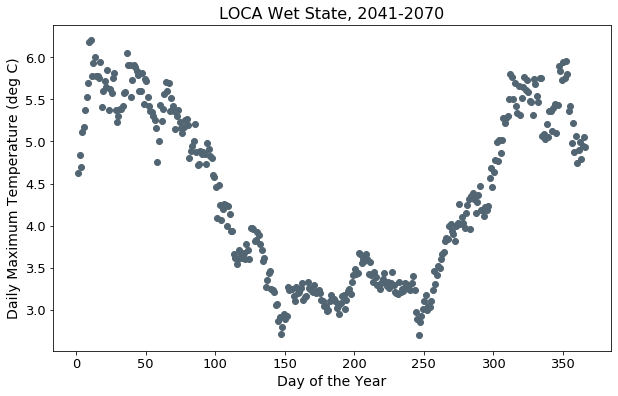

In [118]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:slate', marker='o' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.set_title("LOCA Wet State, %s" % CDateRange, fontsize=16)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Try the Fourier series transform

In [119]:
rft = np.fft.rfft(Tmax)
rft[SM_NUM:] = 0.0
tmax_smooth = np.fft.irfft(rft)

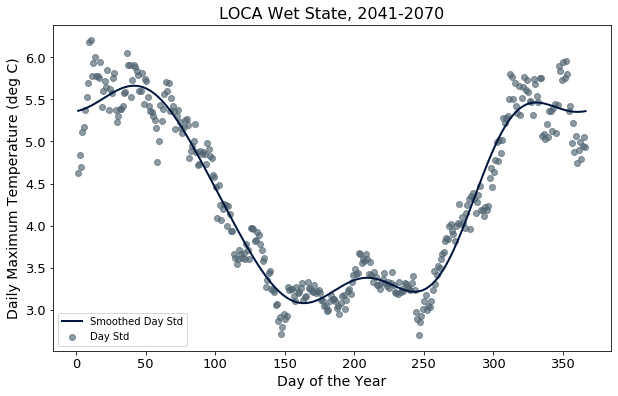

In [120]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:slate', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:navy', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("LOCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [121]:
Tmin = np.array( LOWetDF3['Tmin_C'], dtype=np.float32 )

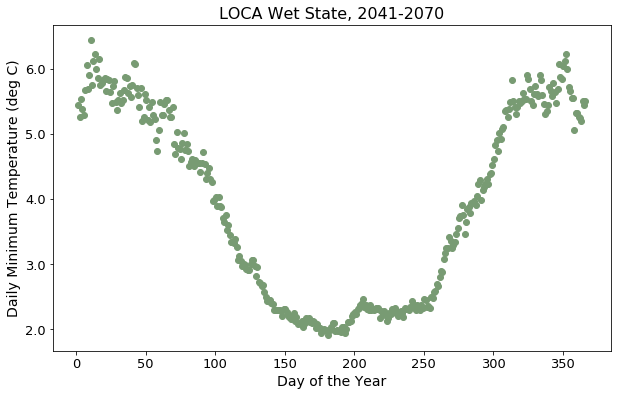

In [122]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:grey green', marker='o' )
ax11.set_title("LOCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [123]:
rft = np.fft.rfft(Tmin)
rft[SM_NUM:] = 0.0
tmin_smooth = np.fft.irfft(rft)

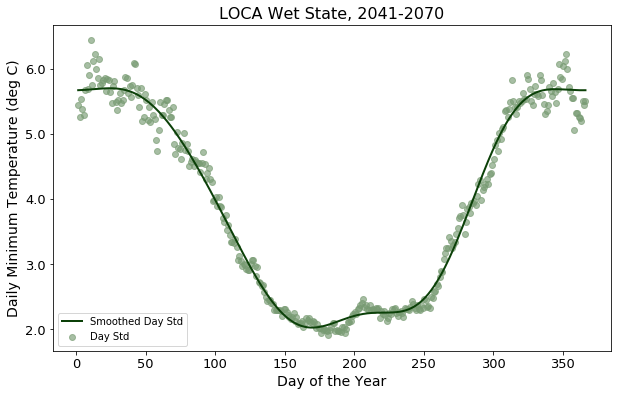

In [124]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:grey green', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:hunter green', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("LOCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

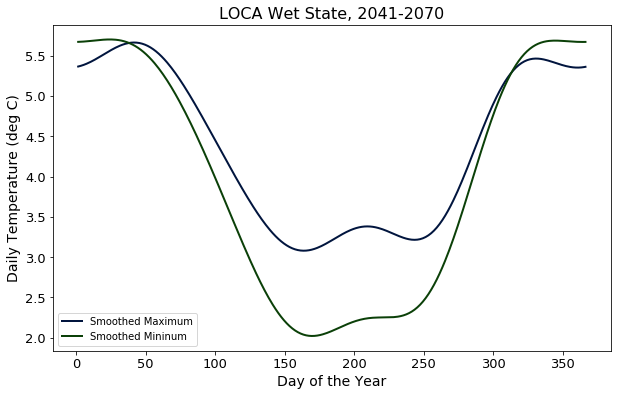

In [125]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:navy', linewidth=2.0, 
           label="Smoothed Maximum")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:hunter green', linewidth=2.0, 
           label="Smoothed Mininum")
ax11.set_title("LOCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [126]:
OutCols

['Tmax_C', 'Tmin_C']

In [127]:
DaysIndexer = np.array( LOWetDF3.index, dtype=np.int32 )
DataDict = { OutCols[0] : tmax_smooth,
             OutCols[1] : tmin_smooth,
           }
LOOutWetDF3 = pd.DataFrame(index=DaysIndexer, data=DataDict )

#### Dry State

In [128]:
Tmax = np.array( LODryDF3['Tmax_C'], dtype=np.float32 )

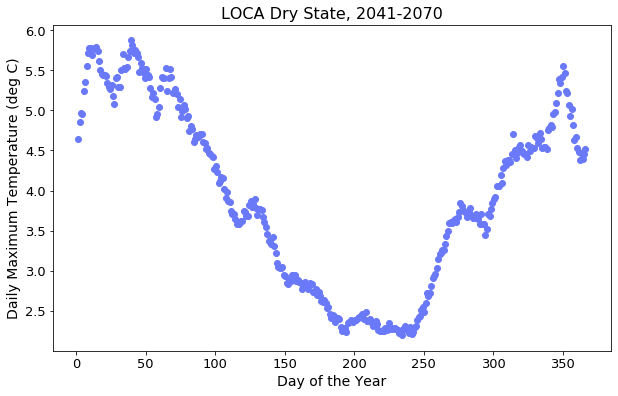

In [129]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:cornflower', marker='o' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.set_title("LOCA Dry State, %s" % CDateRange, fontsize=16)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [130]:
rft = np.fft.rfft(Tmax)
rft[SM_NUM:] = 0.0
tmax_smooth = np.fft.irfft(rft)

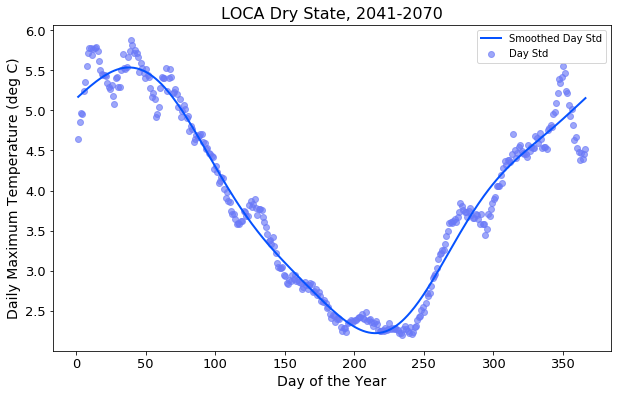

In [131]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:cornflower', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:electric blue', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("LOCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [132]:
Tmin = np.array( LODryDF3['Tmin_C'], dtype=np.float32 )

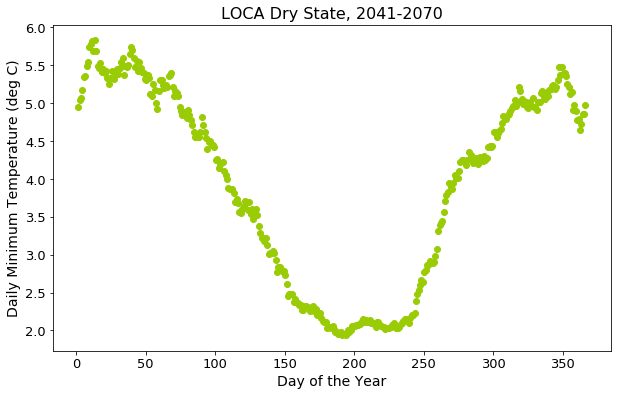

In [133]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:slime green', marker='o' )
ax11.set_title("LOCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [134]:
rft = np.fft.rfft(Tmin)
rft[SM_NUM:] = 0.0
tmin_smooth = np.fft.irfft(rft)

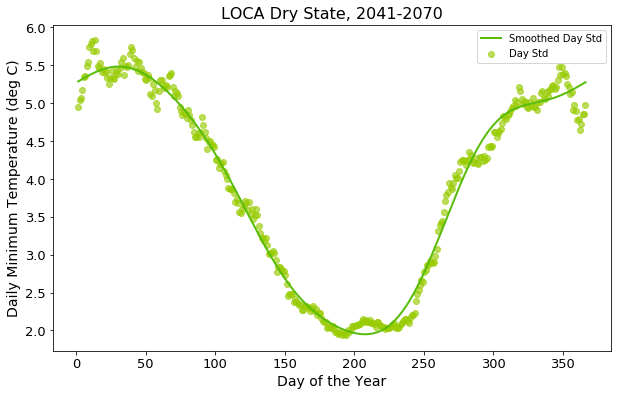

In [135]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:slime green', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:frog green', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("LOCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

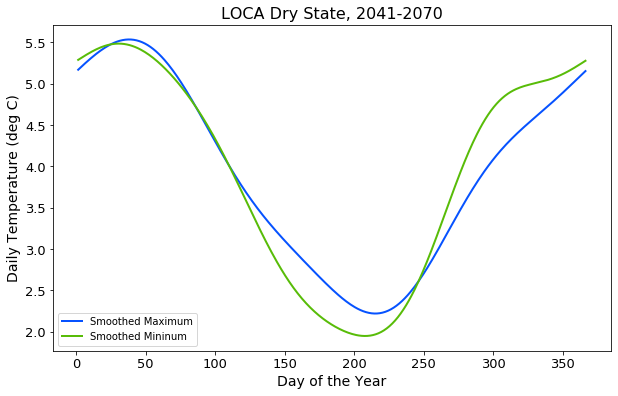

In [136]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:electric blue', linewidth=2.0, 
           label="Smoothed Maximum")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:frog green', linewidth=2.0, 
           label="Smoothed Mininum")
ax11.set_title("LOCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [137]:
DataDict = { OutCols[0] : tmax_smooth,
             OutCols[1] : tmin_smooth,
           }
LOOutDryDF3 = pd.DataFrame(index=DaysIndexer, data=DataDict )

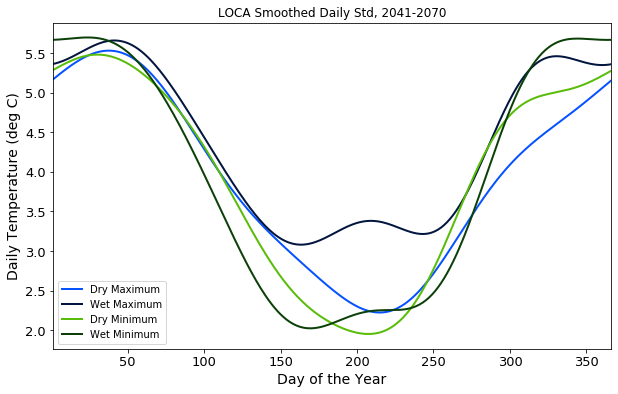

In [138]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
LOOutDryDF3.plot( y=OutCols[0], color='xkcd:electric blue', linewidth=2.0, ax=ax11, 
               label='Dry Maximum' )
LOOutWetDF3.plot( y=OutCols[0], color='xkcd:navy', linewidth=2.0, ax=ax11, 
               label='Wet Maximum' )
LOOutDryDF3.plot( y=OutCols[1], color='xkcd:frog green', linewidth=2.0, ax=ax11, 
               label='Dry Minimum' )
LOOutWetDF3.plot( y=OutCols[1], color='xkcd:hunter green', linewidth=2.0, ax=ax11, 
               label='Wet Minimum' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.set_title( "LOCA Smoothed Daily Std, %s" % CDateRange,)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### BCCA

#### Wet State

In [139]:
Tmax = np.array( BCWetDF3['Tmax_C'], dtype=np.float32 )

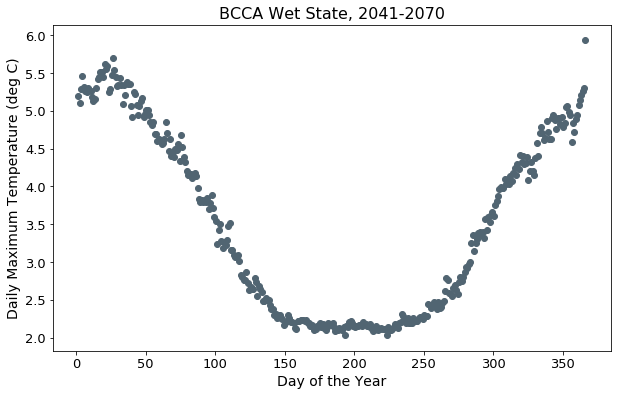

In [140]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:slate', marker='o' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.set_title("BCCA Wet State, %s" % CDateRange, fontsize=16)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Try the Fourier series transform

In [141]:
rft = np.fft.rfft(Tmax)
rft[SM_NUM:] = 0.0
tmax_smooth = np.fft.irfft(rft)

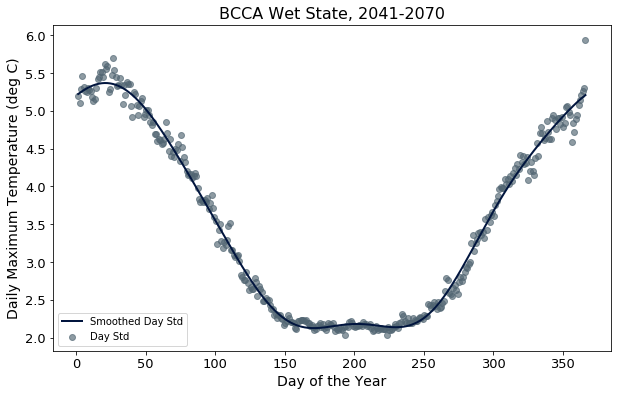

In [142]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:slate', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:navy', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("BCCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [143]:
Tmin = np.array( BCWetDF3['Tmin_C'], dtype=np.float32 )

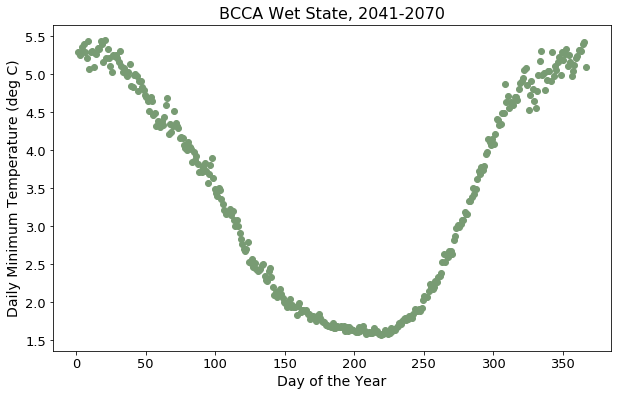

In [144]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:grey green', marker='o' )
ax11.set_title("BCCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [145]:
rft = np.fft.rfft(Tmin)
rft[SM_NUM:] = 0.0
tmin_smooth = np.fft.irfft(rft)

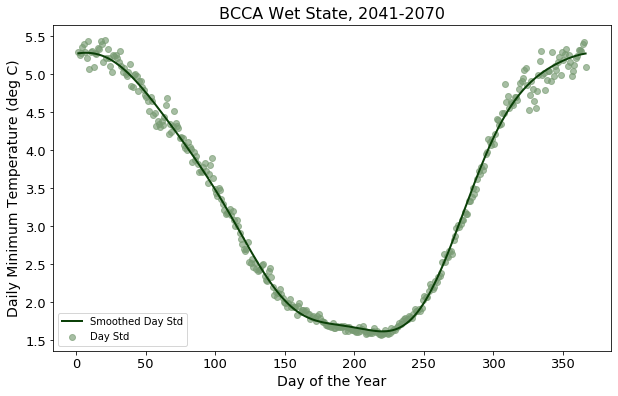

In [146]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:grey green', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:hunter green', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("BCCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

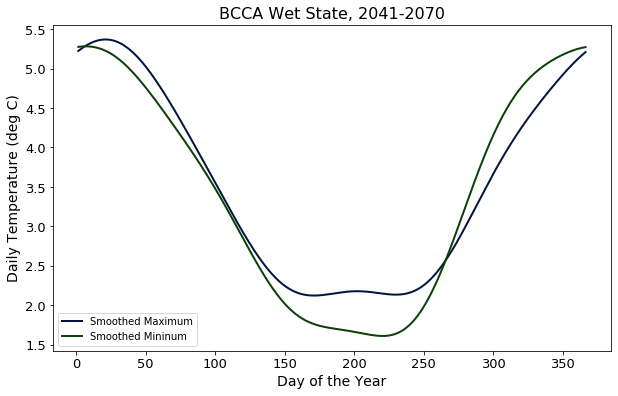

In [147]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:navy', linewidth=2.0, 
           label="Smoothed Maximum")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:hunter green', linewidth=2.0, 
           label="Smoothed Mininum")
ax11.set_title("BCCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [148]:
OutCols

['Tmax_C', 'Tmin_C']

In [149]:
DaysIndexer = np.array( BCWetDF3.index, dtype=np.int32 )
DataDict = { OutCols[0] : tmax_smooth,
             OutCols[1] : tmin_smooth,
           }
BCOutWetDF3 = pd.DataFrame(index=DaysIndexer, data=DataDict )

#### Dry State

In [150]:
Tmax = np.array( BCDryDF3['Tmax_C'], dtype=np.float32 )

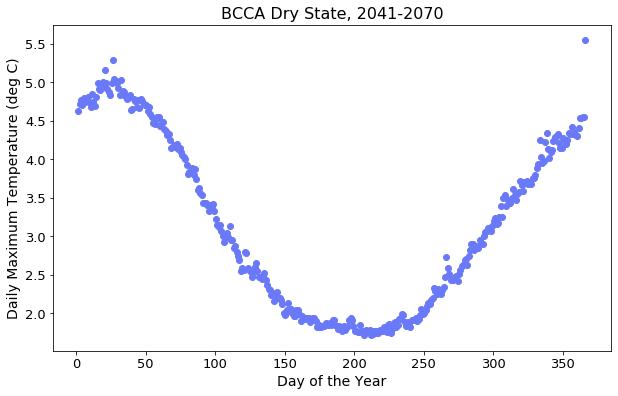

In [151]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:cornflower', marker='o' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.set_title("BCCA Dry State, %s" % CDateRange, fontsize=16)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [152]:
rft = np.fft.rfft(Tmax)
rft[SM_NUM:] = 0.0
tmax_smooth = np.fft.irfft(rft)

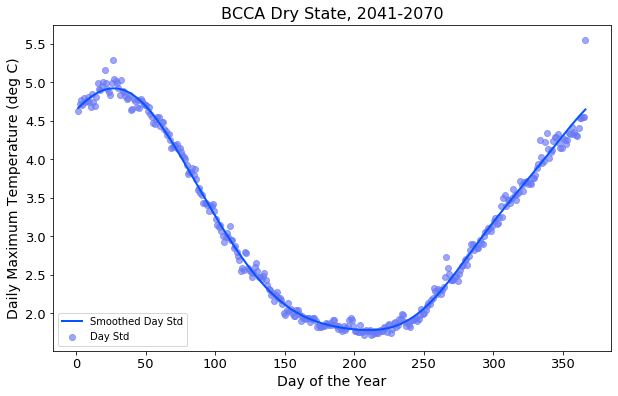

In [153]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:cornflower', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:electric blue', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("BCCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [154]:
Tmin = np.array( BCDryDF3['Tmin_C'], dtype=np.float32 )

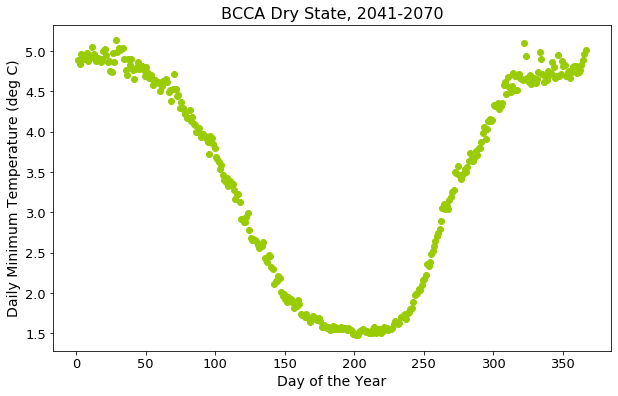

In [155]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:slime green', marker='o' )
ax11.set_title("BCCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [156]:
rft = np.fft.rfft(Tmin)
rft[SM_NUM:] = 0.0
tmin_smooth = np.fft.irfft(rft)

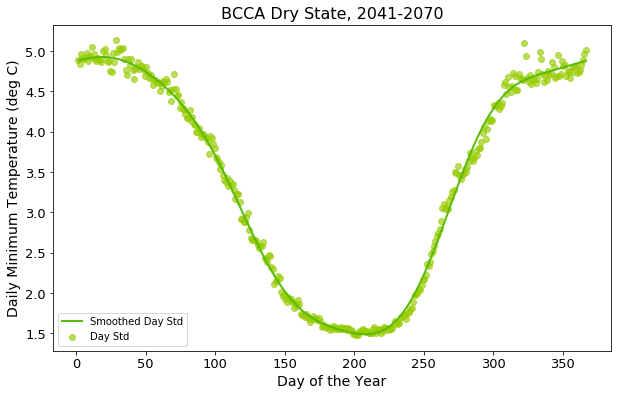

In [157]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:slime green', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:frog green', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("BCCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

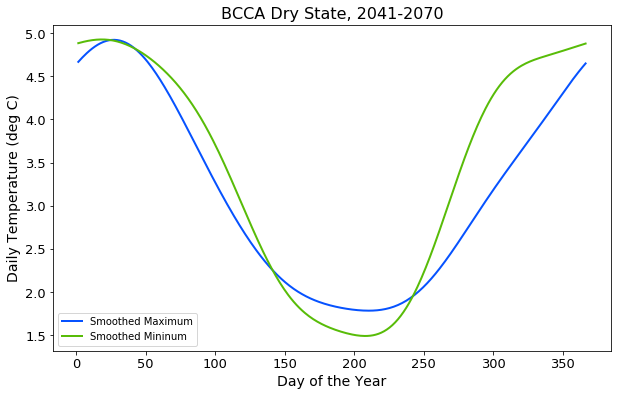

In [158]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:electric blue', linewidth=2.0, 
           label="Smoothed Maximum")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:frog green', linewidth=2.0, 
           label="Smoothed Mininum")
ax11.set_title("BCCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [159]:
DataDict = { OutCols[0] : tmax_smooth,
             OutCols[1] : tmin_smooth,
           }
BCOutDryDF3 = pd.DataFrame(index=DaysIndexer, data=DataDict )

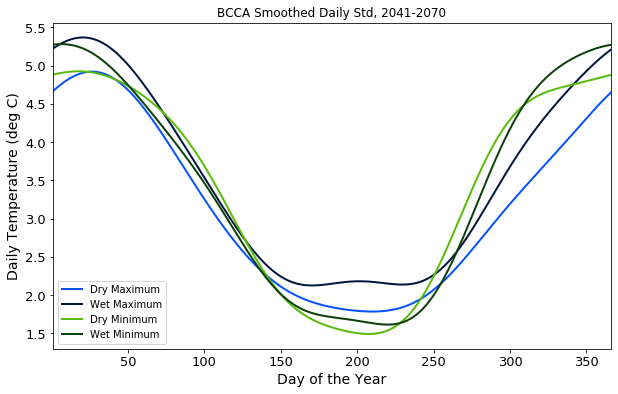

In [160]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
BCOutDryDF3.plot( y=OutCols[0], color='xkcd:electric blue', linewidth=2.0, ax=ax11, 
               label='Dry Maximum' )
BCOutWetDF3.plot( y=OutCols[0], color='xkcd:navy', linewidth=2.0, ax=ax11, 
               label='Wet Maximum' )
BCOutDryDF3.plot( y=OutCols[1], color='xkcd:frog green', linewidth=2.0, ax=ax11, 
               label='Dry Minimum' )
BCOutWetDF3.plot( y=OutCols[1], color='xkcd:hunter green', linewidth=2.0, ax=ax11, 
               label='Wet Minimum' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.set_title( "BCCA Smoothed Daily Std, %s" % CDateRange,)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Output Smoothed

In [161]:
display( HTML( LOOutWetDF3.describe().to_html() ) )

In [162]:
display( HTML( LOOutDryDF3.describe().to_html() ) )

In [163]:
OutXLSX = os.path.normpath( os.path.join( OUT_DIR3, "OWeath_Smooth_Std_%s.xlsx" % CDateRange ))
with pd.ExcelWriter(OutXLSX) as writer:
    LOOutWetDF3.to_excel( writer, sheet_name="LOCA Wet Days", index=True, 
                          index_label="Days", columns=OutCols )
    LOOutDryDF3.to_excel( writer, sheet_name="LOCA Dry Days", index=True, 
                          index_label="Days", columns=OutCols )
    BCOutWetDF3.to_excel( writer, sheet_name="BCCA Wet Days", index=True, 
                          index_label="Days", columns=OutCols )
    BCOutDryDF3.to_excel( writer, sheet_name="BCCA Dry Days", index=True, 
                          index_label="Days", columns=OutCols )

In [164]:
PickOut = os.path.normpath( os.path.join( OUT_DIR3, "OWeath_LOCA_Wet_Smooth_Std_%s.pickle" % CDateRange ))
LOOutWetDF3.to_pickle( PickOut )
PickOut = os.path.normpath( os.path.join( OUT_DIR3, "OWeath_LOCA_Dry_Smooth_Std_%s.pickle" % CDateRange ))
LOOutDryDF3.to_pickle( PickOut )
PickOut = os.path.normpath( os.path.join( OUT_DIR3, "OWeath_BCCA_Wet_Smooth_Std_%s.pickle" % CDateRange ))
BCOutWetDF3.to_pickle( PickOut )
PickOut = os.path.normpath( os.path.join( OUT_DIR3, "OWeath_BCCA_Dry_Smooth_Std_%s.pickle" % CDateRange ))
BCOutDryDF3.to_pickle( PickOut )

## Period 4, Fourier Smoothing of Temperature Parameters

In [165]:
CDateRange = '2071-2100'

### LOCA

#### Wet State

In [166]:
Tmax = np.array( LOWetDF4['Tmax_C'], dtype=np.float32 )

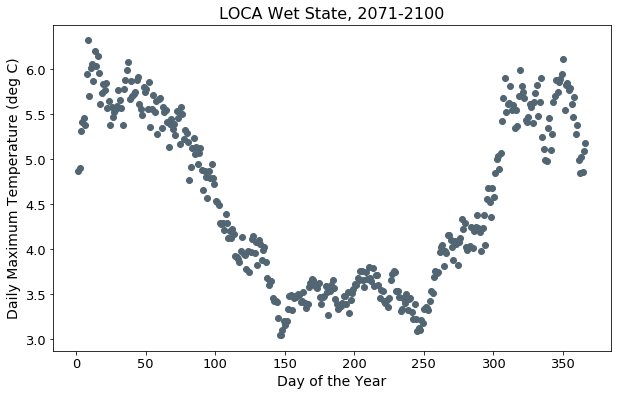

In [167]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:slate', marker='o' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.set_title("LOCA Wet State, %s" % CDateRange, fontsize=16)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Try the Fourier series transform

In [168]:
rft = np.fft.rfft(Tmax)
rft[SM_NUM:] = 0.0
tmax_smooth = np.fft.irfft(rft)

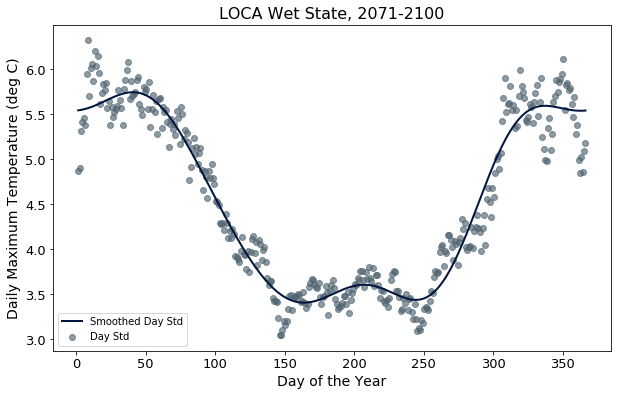

In [169]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:slate', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:navy', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("LOCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [170]:
Tmin = np.array( LOWetDF4['Tmin_C'], dtype=np.float32 )

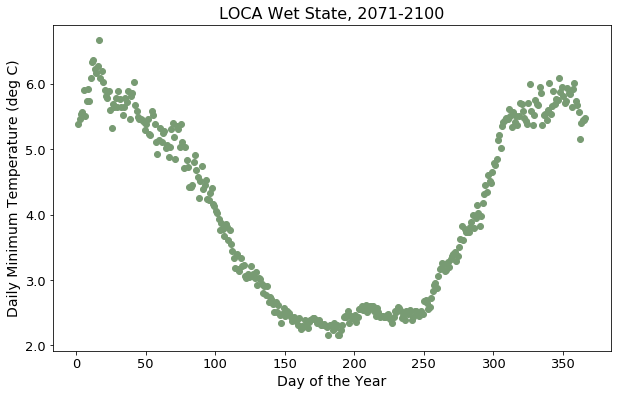

In [171]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:grey green', marker='o' )
ax11.set_title("LOCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [172]:
rft = np.fft.rfft(Tmin)
rft[SM_NUM:] = 0.0
tmin_smooth = np.fft.irfft(rft)

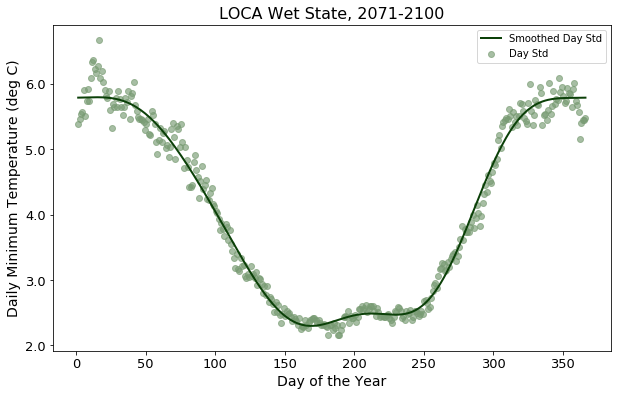

In [173]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:grey green', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:hunter green', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("LOCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

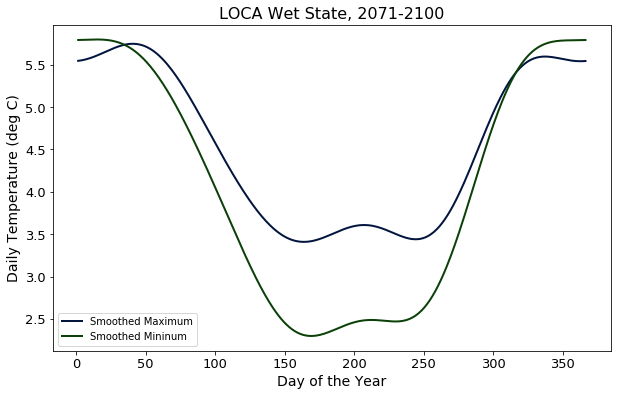

In [174]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:navy', linewidth=2.0, 
           label="Smoothed Maximum")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:hunter green', linewidth=2.0, 
           label="Smoothed Mininum")
ax11.set_title("LOCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [175]:
OutCols

['Tmax_C', 'Tmin_C']

In [176]:
DaysIndexer = np.array( LOWetDF4.index, dtype=np.int32 )
DataDict = { OutCols[0] : tmax_smooth,
             OutCols[1] : tmin_smooth,
           }
LOOutWetDF4 = pd.DataFrame(index=DaysIndexer, data=DataDict )

#### Dry State

In [177]:
Tmax = np.array( LODryDF4['Tmax_C'], dtype=np.float32 )

In [178]:
Tmax.max(), Tmax.min()

(258.05338, 2.4583492)

In [179]:
MaxInd = np.where( Tmax == np.amax(Tmax) )[0][0]

In [180]:
MaxInd

364

In [181]:
Tmax[MaxInd-1], Tmax[MaxInd+1]

(4.817592, 4.650122)

In [182]:
InterpVal = Tmax[MaxInd-1] + ( 0.5*(Tmax[MaxInd+1] - Tmax[MaxInd-1]) )
InterpVal

4.733857154846191

In [183]:
Tmax[MaxInd] = InterpVal

In [184]:
Tmax.max(), Tmax.min()

(5.9589853, 2.4583492)

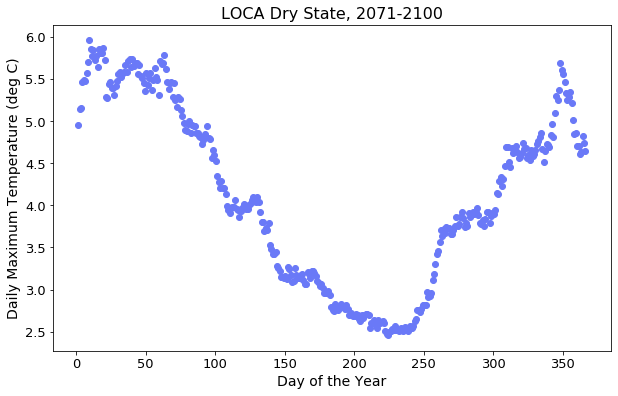

In [185]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:cornflower', marker='o' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.set_title("LOCA Dry State, %s" % CDateRange, fontsize=16)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [186]:
rft = np.fft.rfft(Tmax)
rft[SM_NUM:] = 0.0
tmax_smooth = np.fft.irfft(rft)

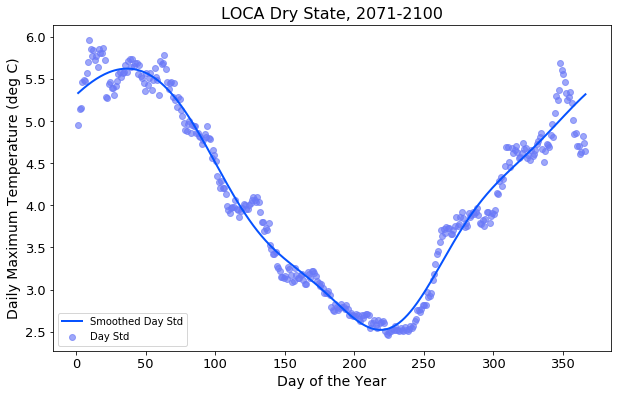

In [187]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:cornflower', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:electric blue', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("LOCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [188]:
Tmin = np.array( LODryDF4['Tmin_C'], dtype=np.float32 )

In [189]:
Tmin.max(), Tmin.min()

(257.6266, 2.3044739)

In [190]:
MaxInd = np.where( Tmin == np.amax(Tmin) )[0][0]

In [191]:
InterpVal = Tmin[MaxInd-1] + ( 0.5*(Tmin[MaxInd+1] - Tmin[MaxInd-1]) )
InterpVal

5.0937581062316895

In [192]:
Tmin[MaxInd] = InterpVal

In [193]:
Tmin.max(), Tmin.min()

(5.926707, 2.3044739)

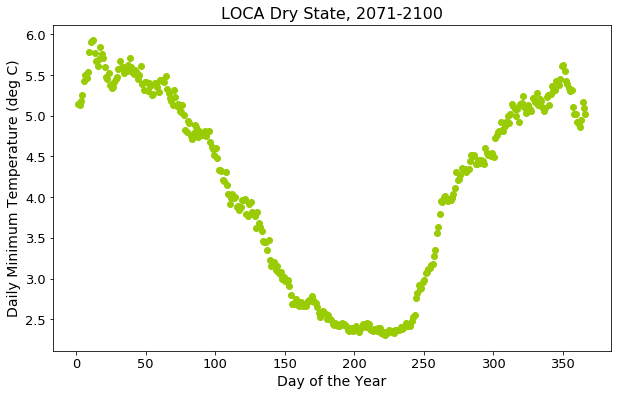

In [194]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:slime green', marker='o' )
ax11.set_title("LOCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [195]:
rft = np.fft.rfft(Tmin)
rft[SM_NUM:] = 0.0
tmin_smooth = np.fft.irfft(rft)

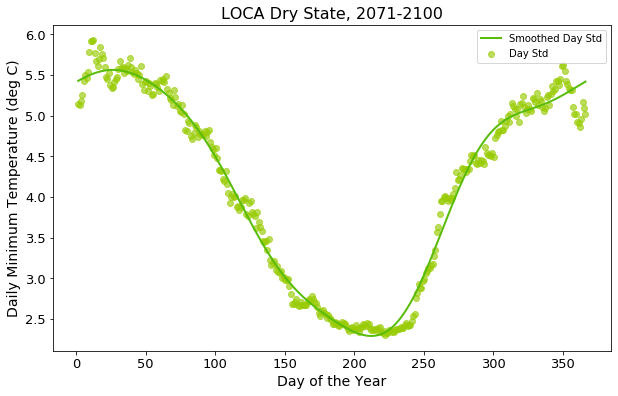

In [196]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:slime green', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:frog green', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("LOCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

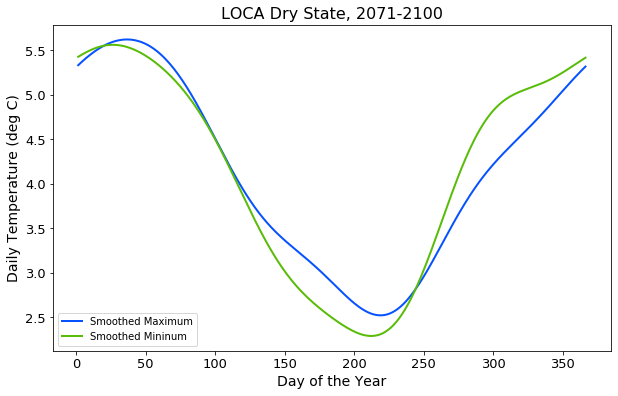

In [197]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:electric blue', linewidth=2.0, 
           label="Smoothed Maximum")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:frog green', linewidth=2.0, 
           label="Smoothed Mininum")
ax11.set_title("LOCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [198]:
DataDict = { OutCols[0] : tmax_smooth,
             OutCols[1] : tmin_smooth,
           }
LOOutDryDF4 = pd.DataFrame(index=DaysIndexer, data=DataDict )

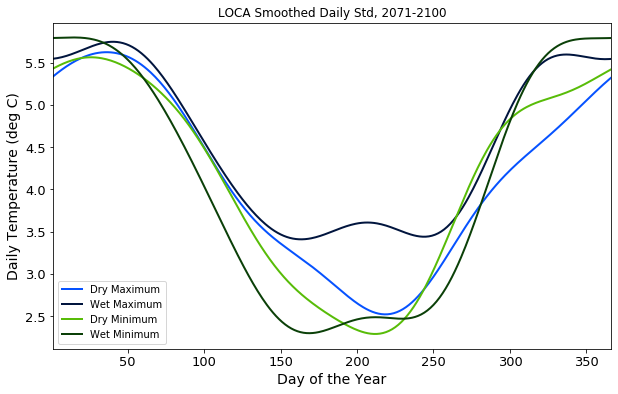

In [199]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
LOOutDryDF4.plot( y=OutCols[0], color='xkcd:electric blue', linewidth=2.0, ax=ax11, 
               label='Dry Maximum' )
LOOutWetDF4.plot( y=OutCols[0], color='xkcd:navy', linewidth=2.0, ax=ax11, 
               label='Wet Maximum' )
LOOutDryDF4.plot( y=OutCols[1], color='xkcd:frog green', linewidth=2.0, ax=ax11, 
               label='Dry Minimum' )
LOOutWetDF4.plot( y=OutCols[1], color='xkcd:hunter green', linewidth=2.0, ax=ax11, 
               label='Wet Minimum' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.set_title( "LOCA Smoothed Daily Std, %s" % CDateRange,)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### BCCA

#### Wet State

In [200]:
Tmax = np.array( BCWetDF4['Tmax_C'], dtype=np.float32 )

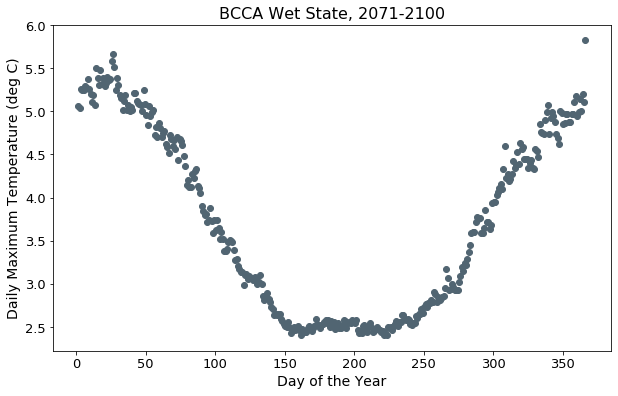

In [201]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:slate', marker='o' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.set_title("BCCA Wet State, %s" % CDateRange, fontsize=16)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Try the Fourier series transform

In [202]:
rft = np.fft.rfft(Tmax)
rft[SM_NUM:] = 0.0
tmax_smooth = np.fft.irfft(rft)

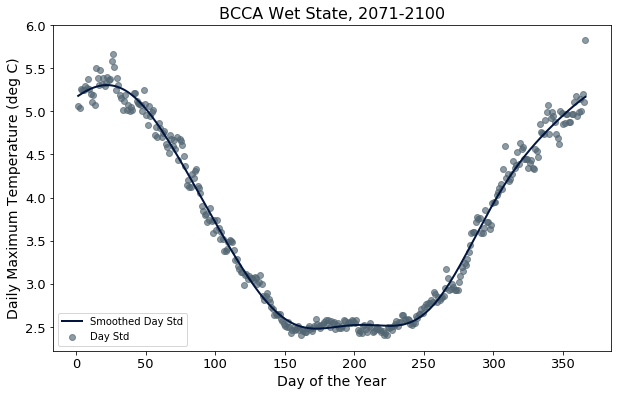

In [203]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:slate', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:navy', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("BCCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [204]:
Tmin = np.array( BCWetDF4['Tmin_C'], dtype=np.float32 )

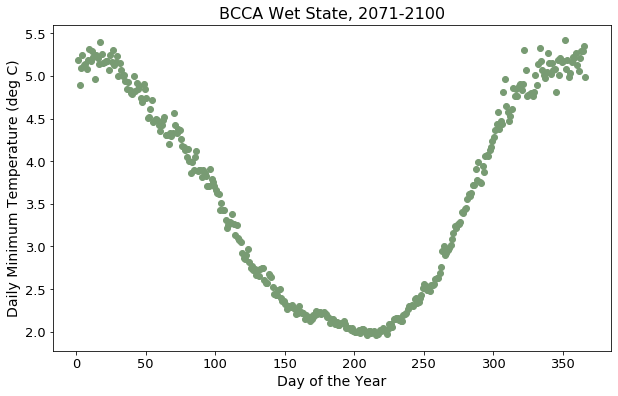

In [205]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:grey green', marker='o' )
ax11.set_title("BCCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [206]:
rft = np.fft.rfft(Tmin)
rft[SM_NUM:] = 0.0
tmin_smooth = np.fft.irfft(rft)

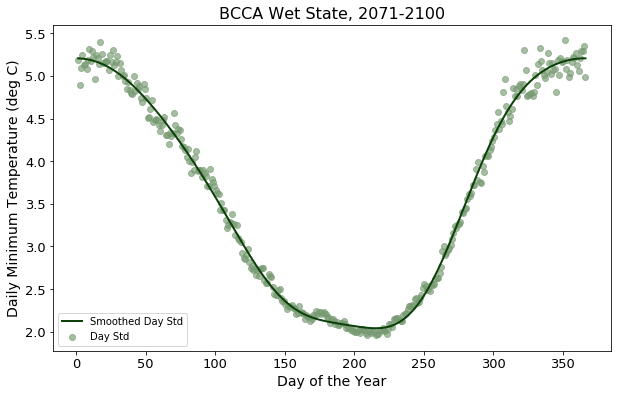

In [207]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:grey green', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:hunter green', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("BCCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

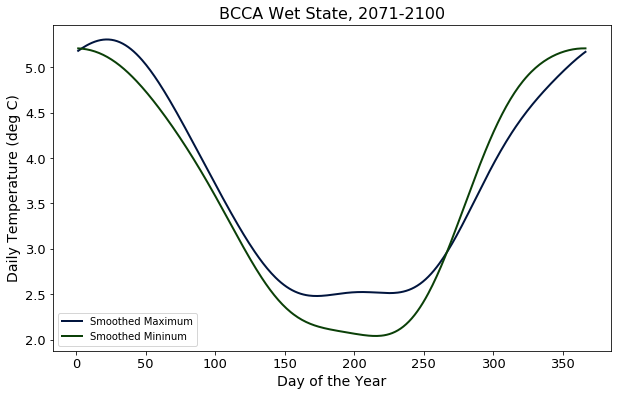

In [208]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:navy', linewidth=2.0, 
           label="Smoothed Maximum")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:hunter green', linewidth=2.0, 
           label="Smoothed Mininum")
ax11.set_title("BCCA Wet State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [209]:
OutCols

['Tmax_C', 'Tmin_C']

In [210]:
DaysIndexer = np.array( BCWetDF4.index, dtype=np.int32 )
DataDict = { OutCols[0] : tmax_smooth,
             OutCols[1] : tmin_smooth,
           }
BCOutWetDF4 = pd.DataFrame(index=DaysIndexer, data=DataDict )

#### Dry State

In [211]:
Tmax = np.array( BCDryDF4['Tmax_C'], dtype=np.float32 )

In [212]:
Tmax.max(), Tmax.min()

(185.10199, 2.158462)

In [213]:
MaxInd = np.where( Tmax == np.amax(Tmax) )[0][0]

In [214]:
InterpVal = Tmax[MaxInd-1] + ( 0.5*(Tmax[MaxInd+1] - Tmax[MaxInd-1]) )
InterpVal

5.096108436584473

In [215]:
Tmax[MaxInd] = InterpVal

In [216]:
Tmax.max(), Tmax.min()

(5.570567, 2.158462)

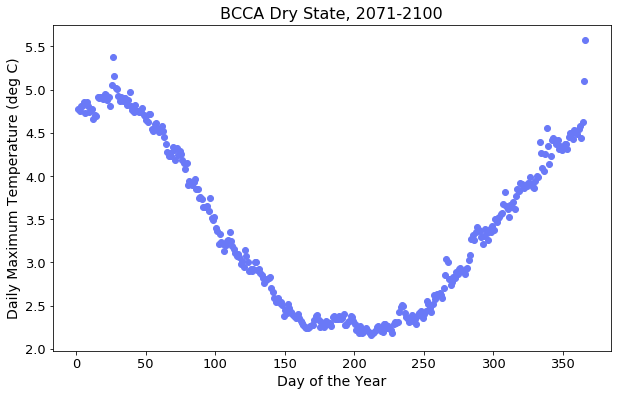

In [217]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:cornflower', marker='o' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.set_title("BCCA Dry State, %s" % CDateRange, fontsize=16)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [218]:
rft = np.fft.rfft(Tmax)
rft[SM_NUM:] = 0.0
tmax_smooth = np.fft.irfft(rft)

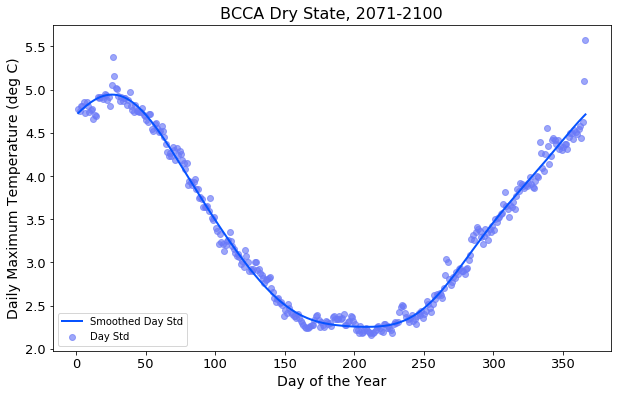

In [219]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:cornflower', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:electric blue', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("BCCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [220]:
Tmin = np.array( BCDryDF4['Tmin_C'], dtype=np.float32 )

In [221]:
Tmin.max(), Tmin.min()

(184.79375, 1.9317863)

In [222]:
MaxInd = np.where( Tmin == np.amax(Tmin) )[0][0]

In [223]:
InterpVal = Tmin[MaxInd-1] + ( 0.5*(Tmin[MaxInd+1] - Tmin[MaxInd-1]) )
InterpVal

4.939293622970581

In [224]:
Tmin[MaxInd] = InterpVal

In [225]:
Tmin.max(), Tmin.min()

(5.239315, 1.9317863)

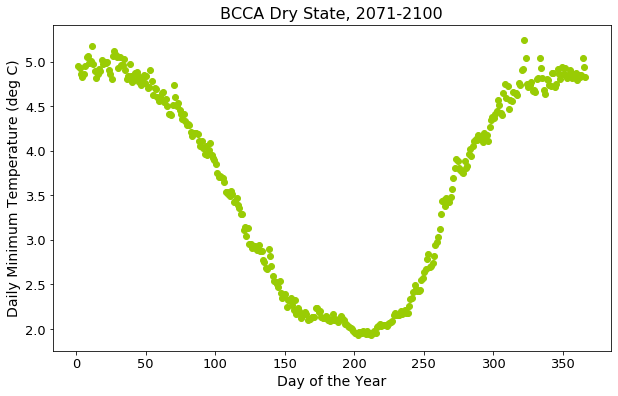

In [226]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:slime green', marker='o' )
ax11.set_title("BCCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [227]:
rft = np.fft.rfft(Tmin)
rft[SM_NUM:] = 0.0
tmin_smooth = np.fft.irfft(rft)

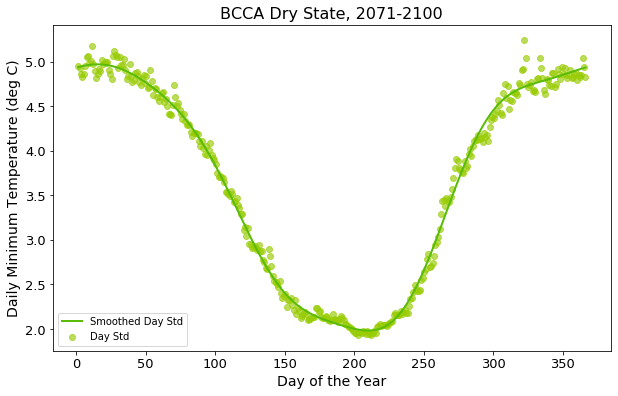

In [228]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:slime green', marker='o', alpha=0.65, label="Day Std")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:frog green', linewidth=2.0, 
           label="Smoothed Day Std")
ax11.set_title("BCCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

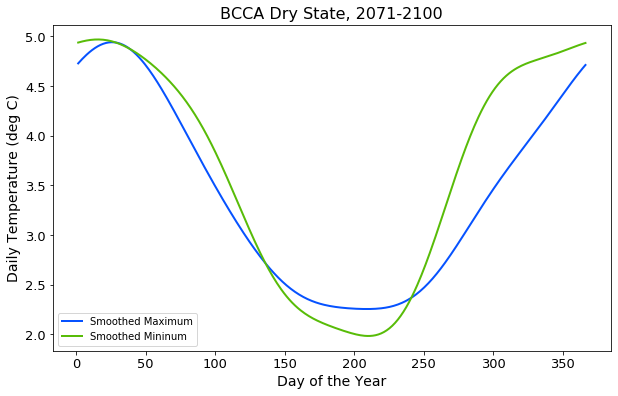

In [229]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:electric blue', linewidth=2.0, 
           label="Smoothed Maximum")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:frog green', linewidth=2.0, 
           label="Smoothed Mininum")
ax11.set_title("BCCA Dry State, %s" % CDateRange, fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [230]:
DataDict = { OutCols[0] : tmax_smooth,
             OutCols[1] : tmin_smooth,
           }
BCOutDryDF4 = pd.DataFrame(index=DaysIndexer, data=DataDict )

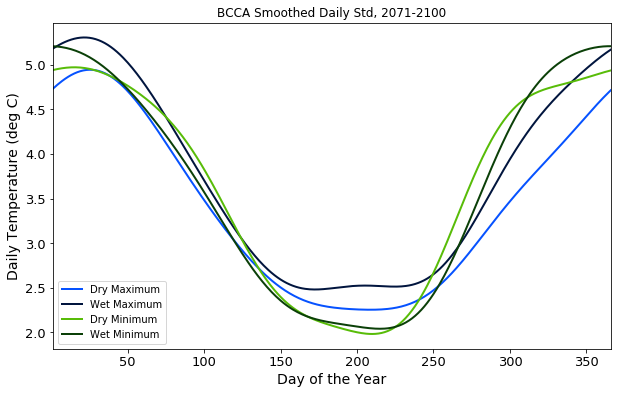

In [231]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
BCOutDryDF4.plot( y=OutCols[0], color='xkcd:electric blue', linewidth=2.0, ax=ax11, 
               label='Dry Maximum' )
BCOutWetDF4.plot( y=OutCols[0], color='xkcd:navy', linewidth=2.0, ax=ax11, 
               label='Wet Maximum' )
BCOutDryDF4.plot( y=OutCols[1], color='xkcd:frog green', linewidth=2.0, ax=ax11, 
               label='Dry Minimum' )
BCOutWetDF4.plot( y=OutCols[1], color='xkcd:hunter green', linewidth=2.0, ax=ax11, 
               label='Wet Minimum' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.set_title( "BCCA Smoothed Daily Std, %s" % CDateRange,)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Output Smoothed

In [232]:
display( HTML( LOOutWetDF4.describe().to_html() ) )

In [233]:
display( HTML( LOOutDryDF4.describe().to_html() ) )

In [234]:
OutXLSX = os.path.normpath( os.path.join( OUT_DIR4, "OWeath_Smooth_Std_%s.xlsx" % CDateRange ))
with pd.ExcelWriter(OutXLSX) as writer:
    LOOutWetDF4.to_excel( writer, sheet_name="LOCA Wet Days", index=True, 
                          index_label="Days", columns=OutCols )
    LOOutDryDF4.to_excel( writer, sheet_name="LOCA Dry Days", index=True, 
                          index_label="Days", columns=OutCols )
    BCOutWetDF4.to_excel( writer, sheet_name="BCCA Wet Days", index=True, 
                          index_label="Days", columns=OutCols )
    BCOutDryDF4.to_excel( writer, sheet_name="BCCA Dry Days", index=True, 
                          index_label="Days", columns=OutCols )

In [235]:
PickOut = os.path.normpath( os.path.join( OUT_DIR4, "OWeath_LOCA_Wet_Smooth_Std_%s.pickle" % CDateRange ))
LOOutWetDF4.to_pickle( PickOut )
PickOut = os.path.normpath( os.path.join( OUT_DIR4, "OWeath_LOCA_Dry_Smooth_Std_%s.pickle" % CDateRange ))
LOOutDryDF4.to_pickle( PickOut )
PickOut = os.path.normpath( os.path.join( OUT_DIR4, "OWeath_BCCA_Wet_Smooth_Std_%s.pickle" % CDateRange ))
BCOutWetDF4.to_pickle( PickOut )
PickOut = os.path.normpath( os.path.join( OUT_DIR4, "OWeath_BCCA_Dry_Smooth_Std_%s.pickle" % CDateRange ))
BCOutDryDF4.to_pickle( PickOut )

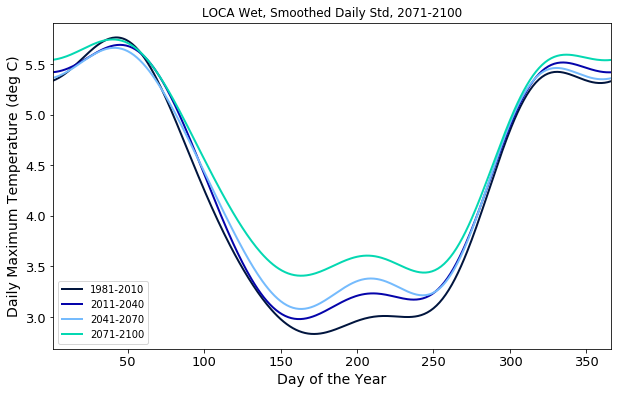

In [236]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
LOOutWetDF1.plot( y=OutCols[0], color='xkcd:navy', linewidth=2.0, ax=ax11, 
               label='1981-2010' )
LOOutWetDF2.plot( y=OutCols[0], color='xkcd:royal blue', linewidth=2.0, ax=ax11, 
               label='2011-2040' )
LOOutWetDF3.plot( y=OutCols[0], color='xkcd:sky blue', linewidth=2.0, ax=ax11, 
               label='2041-2070' )
LOOutWetDF4.plot( y=OutCols[0], color='xkcd:aquamarine', linewidth=2.0, ax=ax11, 
               label='2071-2100' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.set_title( "LOCA Wet, Smoothed Daily Std, %s" % CDateRange,)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

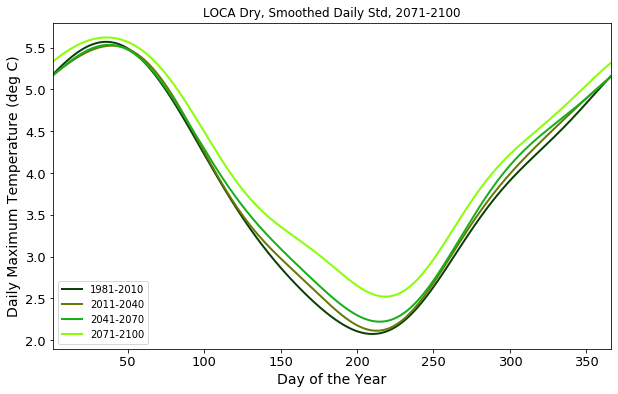

In [237]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
LOOutDryDF1.plot( y=OutCols[0], color='xkcd:hunter green', linewidth=2.0, ax=ax11, 
               label='1981-2010' )
LOOutDryDF2.plot( y=OutCols[0], color='xkcd:olive green', linewidth=2.0, ax=ax11, 
               label='2011-2040' )
LOOutDryDF3.plot( y=OutCols[0], color='xkcd:green', linewidth=2.0, ax=ax11, 
               label='2041-2070' )
LOOutDryDF4.plot( y=OutCols[0], color='xkcd:lime green', linewidth=2.0, ax=ax11, 
               label='2071-2100' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.set_title( "LOCA Dry, Smoothed Daily Std, %s" % CDateRange,)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

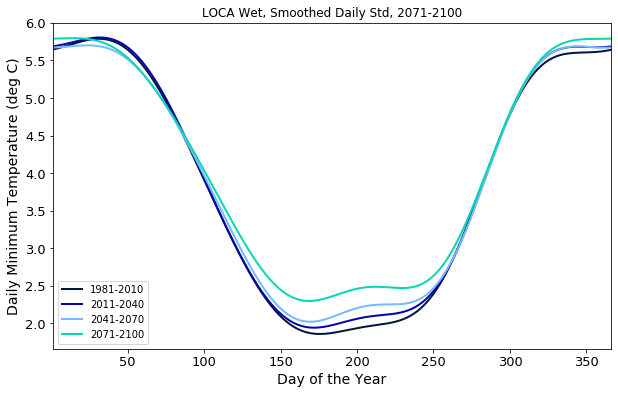

In [238]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
LOOutWetDF1.plot( y=OutCols[1], color='xkcd:navy', linewidth=2.0, ax=ax11, 
               label='1981-2010' )
LOOutWetDF2.plot( y=OutCols[1], color='xkcd:royal blue', linewidth=2.0, ax=ax11, 
               label='2011-2040' )
LOOutWetDF3.plot( y=OutCols[1], color='xkcd:sky blue', linewidth=2.0, ax=ax11, 
               label='2041-2070' )
LOOutWetDF4.plot( y=OutCols[1], color='xkcd:aquamarine', linewidth=2.0, ax=ax11, 
               label='2071-2100' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.set_title( "LOCA Wet, Smoothed Daily Std, %s" % CDateRange,)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

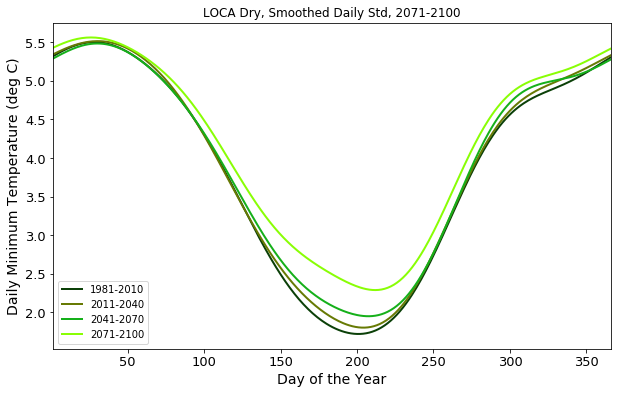

In [239]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
LOOutDryDF1.plot( y=OutCols[1], color='xkcd:hunter green', linewidth=2.0, ax=ax11, 
               label='1981-2010' )
LOOutDryDF2.plot( y=OutCols[1], color='xkcd:olive green', linewidth=2.0, ax=ax11, 
               label='2011-2040' )
LOOutDryDF3.plot( y=OutCols[1], color='xkcd:green', linewidth=2.0, ax=ax11, 
               label='2041-2070' )
LOOutDryDF4.plot( y=OutCols[1], color='xkcd:lime green', linewidth=2.0, ax=ax11, 
               label='2071-2100' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.set_title( "LOCA Dry, Smoothed Daily Std, %s" % CDateRange,)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )